<header style="padding:10px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

# Vantage Analytic Library and teradataml Demo Notebook  

</header>

This notebook shows the power of Vantage and the Analytic Library through a series of functions that use the Teradata SQLE to perform descriptive statistics, data engineering and transformation, model building, model evaluation and model scoring.  All Analytic Library functions are called through Python using the teradataml interfaces for VAL.  Once the heavy lifting is done by the SQL engine, Python (Matplotlib and plotly) are used to generate the plots herein.  The analyses that are used include the following.  The overall use case is also summarized below.

##  Analytic Library and teradataml Demo Use Case

### Demo data - Financial Customers/Accounts/Transactions

The following data has been put into the TRNG_XSP database on Transcend for the examples in this Python  Notebook.  Its a simplistic ficticious dataset of banking customers (10K-ish rows), Accounts (20K-ish rows) and Transactions (1M-ish rows).  They are related to each other in the following ways:

![TWMDemoDataModel](img/DemoData.png)

Within this use case, we explore the raw data using the VAL Descriptive Statistical functions along with many different plots and graphs.  Based upon our findings, we begin to assemble an analytic data set through a combination of VAL Transformation functions, as well as the pandas/SQLAlchemy support in teradataml.  Finally, we use Logistic Regression to predict which of our existing customer base has the highest propensity to open up a credit card account.

###  Descriptive Statistics

#### Values Analysis
    
- Data Types
- Count
- Number NULLs, Positive, Negative and Unique, Zero and Blank values

#### Univariate Statistical Analysis
- Count/Minimum/Maximum/Mean
- Standard Deviation
- Standard Mean Error
- Variance & Coefficient of Variance
- Skewness & Kurtosis 
- Uncorrected Sum of Squares
- Corrected Sum of Squares
- Modes
- Quantiling & Ranking
    - Top 10/Bottom 10 Percentiles*
    - Deciles/Quartiles/Tertiles*
    - Top 5/Bottom 5 Ranks and Values*

#### Distribution Analysis

##### Frequency of Discrete Variables

| Style | Description |
| --- | --- |
| basic | Counts frequencies of individual column values (default). |
| pairwise | Counts frequencies of pair-wise combinations of values of selected columns rather than individually. Not available if the cumulative option is selected. |
| crosstab | Counts frequencies of combinations of values of selected columns rather than individually. |

##### Histograms of Continuous Variables

| Option | Description/Example |
| --- | --- |
| bins | The number of equal width bins to create. |
| | For example, bins=5. If multiple columns are requested, multiple bin sizes may be specified, such as bins=5, 10. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 bins. |
| widths | The width of the bins to create. |
| | For example, widths=100. If multiple columns are requested, multiple widths must be specified, such as widths=5, 10. If fewer sizes are specified than columns, an error message displays. |
| quantiles | The number of approximately equally populated bins to create. |
| | For example, quantiles=10. If multiple columns are requested, multiple quantile sizes may be specified, such as quantiles=5, 10. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 quantiles. |
| boundaries | Specific boundaries that define the bins. |
| | For example, boundaries=0,50,100,150 provides 3 bins between 0 and 150 (0 to 50, 50 to 100, and 100 to 150). If multiple columns are requested, multiple sets of parameters must be specified, such as boundaries={0, 50000, 100000, 150000}, {0, 50, 100}. |
| binwithminmax | The number of bins spanning a range specified by the minimum and maximum values. |
| | For example, binwithminmax=5,0,200 creates 5 bins ranging from 0 to 200. If multiple columns are requested, multiple sets of parameters must be specified, such as binwithminmax={10, 0, 200000}, {5, 0, 100}.|

A seperate (Adaptive Histogram) analysis is offered to intelligently bin data by offering options to further subdivide the distribution. 

#### Matrix Analysis
- reate a matrix for input to Linear Regression (or Factor Analysis in the next release) or analysis of any of the following types of matrices:
    - SSCP = sum-of-squares-and-cross-products matrix (the default)
    - ESSCP = Extended-sum-of-squares-and-cross-products matrix
    - CSSCP = Corrected-sum-of-squares-and-cross-products matrix
    - COV = Covariance matrix
    - COR = Correlation matrix

### Variable Transformation Functions

The Variable Transformation analysis reads a single table or view and produces a Select, Create Table, or Create View statement containing transformed columns.  Each function below can be called individually or in any combination. 

#### Bin Coding

Bin Coding replaces a continuous numeric column with a categorical one and produce ordinal values (for example, numeric categorical values where order is meaningful). Bin Coding uses the same techniques used in Histogram analysis, allowing you to choose between equal-width bins, equal-width bins with a user-specified minimum and maximum range, bins with a user-specified width, evenly distributed bins, or bins with user-specified boundaries.

#### Design Coding

Design Coding is useful when a categorical data element must be re-expressed as one or more numeric data elements, creating a binary numeric field for each categorical data value. Design coding is offered in two forms: dummy-coding and contrast-coding.

#### Recoding

Recoding a categorical data column is done to re-express existing values of a column (variable) into a new coding scheme or to correct data quality problems and focus an analysis on a particular value. It allows for mapping individual values, NULL values, or any number of remaining values (ELSE option) to a new value, a NULL value or the same value.

#### Rescaling

Rescaling limits the upper and lower boundaries of the data in a continuous numeric column using a linear rescaling function based on maximum and minimum data values. Rescale is useful with algorithms that require or work better with data within a certain range.

#### Sigmoid Transformation

A Sigmoid transformation provides rescaling of continuous numeric data in a more sophisticated way than the Rescaling transformation function. In a Sigmoid transformation a numeric column is transformed using a type of sigmoid or s-shaped function. 

#### Z-Score Transformation

Similar to a Sigmoid transformation, a Z-Score transformation provides rescaling of continuous numeric data in a more sophisticated way than a Rescaling transformation.  Z-Score transforms each column value into the number of standard deviations from the mean value of the column.

#### NULL Value Replacement

NULL value replacement is offered as a transformation function. A literal value, the mean, median, mode, or an imputed value joined from another table can be used as the replacement value. The median value can be requested with or without averaging of two middle values when there is an even number of values.

#### Formula Derivations

The Derive transformation requires the free-form transformation be specified as a formula using the following operators, arguments, and functions:  +, -, **, *, /, %, (, ), x, y, z, abs, exp, ln, log, sqrt

### Logistic Regression

Logistic Regression is one of the most widely used types of statistical analysis.  In Logistic Regression, a set of independent variables (in this case columns) is processed to predict the value of a dependent variable (column) that assumes two values referred to as response (1) and non-response (0).  Actually, the user specifies what value of the dependent variable to treat as the response, and all other values assumed by the depedent variable are treated as non-repsonse.  The result is not however a continuous numeric variable as seen in Linear Regression, but rather a probability between 0 and 1 that the response value is assumed by the dependent variable.  teradataml splits separate function out for model building, evaluation and scoring.

In [1]:
# Load teradataml and dependency packages

from teradataml import create_context, DataFrame, get_context, copy_to_sql, in_schema, remove_context
from teradataml.dataframe.sql_functions import case
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import getpass as gp
from sqlalchemy.sql.expression import select, or_, extract, text, join, case as case_when
from sqlalchemy import func

# Import "valib" object from teradataml to execute Vantage Analytic Library functions.
# Set 'configure.val_install_location' to the database name where Vantage analytic library functions are installed.

from teradataml import *
from teradataml.analytics.valib import *
from teradataml import configure
configure.val_install_location = "val"

#from pycaret.utils import enable_colab
#enable_colab()

import warnings
warnings.filterwarnings("ignore")
import xml.dom.minidom

import pylab
import getpass

In [2]:
%matplotlib inline

# define matplotlib styles for this notebook
plt.style.use('fivethirtyeight')
pylab.rcParams['figure.figsize'] = (20, 6)
pylab.rcParams['font.size'] = 16
pylab.rcParams['text.color'] = 'black'
pylab.rcParams['axes.labelcolor'] = 'black'
pylab.rcParams['xtick.color'] =  'black'
pylab.rcParams['ytick.color'] =  'black'  
pylab.rcParams['ytick.labelsize'] = 'large'

#pylab.rcParams.keys() 

## Connection

In [3]:
# Establish connection to Teradata Vantage server (uses the Teradata SQL Driver
# for Python). Before you execute the following statement, replace the variables
# <HOSTNAME>, <UID> and <PWD> with your target Vantage system hostname (or
# IP address), and your database user ID and password, respectively.  Target
# Transcend Vantage systems (tdprd, tdprd2 or tdprd3 (AKA Vantage LIVE)) include:
#
#   NAME=Transcend-Production, USER=, HOST=tdprd.td.teradata.com, PROPS="logMech=LDAP,logmech=LDAP"
#   NAME=Transcend-Production-AWS, USER=, HOST=tdprd2.td.teradata.com, PROPS="logMech=LDAP,logmech=LDAP"
#   NAME=Vantage-LIVE, USER=, HOST=tdprd3.td.teradata.com, PROPS="logMech=LDAP,logmech=LDAP"

td_context = create_context(host = 'host.docker.internal', username='demo_user', password = getpass.getpass())
#td_context = create_context(host="tdprdX.td.teradata.com", username="xy123456", password=gp.getpass(prompt='Password:'), logmech="LDAP")

 ········


## Creation and loading of tables

In [4]:
#Accounts table
query = '''
CREATE MULTISET TABLE Demo_user.Accounts 
     (
      acct_nbr VARCHAR(18) CHARACTER SET UNICODE NOT CASESPECIFIC,
      cust_id INTEGER,
      acct_type VARCHAR(2) CHARACTER SET UNICODE NOT CASESPECIFIC,
      account_active VARCHAR(1) CHARACTER SET UNICODE NOT CASESPECIFIC,
      acct_start_date DATE FORMAT 'YY/MM/DD',
      starting_balance DECIMAL(11,3),
      ending_balance DECIMAL(11,3))
UNIQUE PRIMARY INDEX ( acct_nbr );
'''

try:
    td_context.execute(query)
except:
    td_context.execute('DROP TABLE Demo_user.Accounts;')
    td_context.execute(query)


In [5]:
#Customer table
query = '''
CREATE MULTISET TABLE Demo_user.Customer 
     (
      cust_id INTEGER,
      income DECIMAL(15,1),
      age INTEGER,
      years_with_bank INTEGER,
      nbr_children INTEGER,
      gender VARCHAR(1) CHARACTER SET UNICODE NOT CASESPECIFIC,
      marital_status VARCHAR(1) CHARACTER SET UNICODE NOT CASESPECIFIC,
      postal_code VARCHAR(5) CHARACTER SET UNICODE NOT CASESPECIFIC,
      state_code VARCHAR(2) CHARACTER SET UNICODE NOT CASESPECIFIC)
UNIQUE PRIMARY INDEX ( cust_id );
'''

try:
    td_context.execute(query)
except:
    td_context.execute('DROP TABLE Demo_user.Customer;')
    td_context.execute(query)


In [6]:
#Transctions table
query = '''
CREATE MULTISET TABLE Demo_user.Transactions 
     (
      tran_id INTEGER,
      acct_nbr VARCHAR(18) CHARACTER SET LATIN NOT CASESPECIFIC,
      tran_amt DECIMAL(9,2),
      principal_amt DECIMAL(15,2),
      interest_amt DECIMAL(11,3),
      new_balance DECIMAL(9,2),
      tran_date DATE FORMAT 'YY/MM/DD',
      tran_time INTEGER,
      channel VARCHAR(1) CHARACTER SET LATIN NOT CASESPECIFIC,
      tran_code VARCHAR(2) CHARACTER SET LATIN NOT CASESPECIFIC)
UNIQUE PRIMARY INDEX ( tran_id ,acct_nbr );
'''

try:
    td_context.execute(query)
except:
    td_context.execute('DROP TABLE Demo_user.Transactions;')
    td_context.execute(query)

In [7]:
td_context.execute('INSERT into Demo_user.Accounts select acct_nbr,cust_id,acct_type,account_active,acct_start_date,starting_balance,ending_balance from gs_tables_db.TRNG_XSP_Accounts;')

In [8]:
 td_context.execute('INSERT into Demo_user.Customer select cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,state_code from gs_tables_db.TRNG_XSP_Customer;')

In [9]:
td_context.execute('INSERT into Demo_user.Transactions select tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code from gs_tables_db.TRNG_XSP_Transactions;')

In [10]:
# Create DataFrames for the Customer, Accounts and Transactions tables in the
# Vantage Advanced SQL Engine. 
tdCustomer = DataFrame(in_schema("Demo_user", "Customer"))

# Using to_pandas() for a cleaner display format
tdCustomer.to_pandas().head(10)

income  age  years_with_bank  nbr_children gender marital_status  \
cust_id                                                                       
25902814   2959.4   51                8             0      F              1   
23175148  14354.8   39                5             2      F              2   
28620753      0.0   16                8             1      M              1   
24526440  52853.4   38                6             5      F              4   
25897247    842.6   70                7             0      F              2   
24532272  34003.8   71                9             2      M              3   
27259000  23870.0   60                2             0      F              2   
25891680   3573.1   24                6             0      M              1   
21805952  44457.4   47               10             3      F              3   
20443995  29734.5   60                7             3      M              2   

         postal_code state_code  
cust_id                          
25902814       94299         CA  
23175148       37232         TN  
28620753       97248         OR  
24526440       94293         CA  
25897247       10101         NY  
24532272       46227         IN  
27259000       40564         KY  
25891680       60665         IL  
21805952       90141         CA  
20443995       97237         OR

In [11]:
tdAccounts = DataFrame(in_schema("Demo_user", "Accounts"))
# Using to_pandas() for a cleaner display format
tdAccounts.to_pandas().head(10)

cust_id acct_type account_active acct_start_date  \
acct_nbr                                                                
456114321362917423  31347091        CC              Y      1995-12-13   
000000001363158310  13631580        SV              Y      1995-07-06   
000000001362897221  28620837        CK              Y      1995-08-01   
456114321362580422  29976760        CC              Y      1992-03-30   
000000001362630217  23164710        CK              Y      1991-03-12   
456114321363303415  20449545        CC              Y      1995-04-22   
000000001362613317  23164421        SV              Y      1995-12-30   
000000001363429212  16361148        CK              Y      1994-09-30   
456114321362701423  31342123        CC              Y      1995-11-08   
000000001362835222  29982370        CK              Y      1995-09-22   

                   starting_balance ending_balance  
acct_nbr                                            
456114321362917423           11.000       6890.000  
000000001363158310         1470.562       8629.740  
000000001362897221          173.120         11.330  
456114321362580422          493.856      13650.000  
000000001362630217         2799.050        396.025  
456114321363303415            0.000       5100.000  
000000001362613317          255.650       1050.838  
000000001363429212          354.324        629.391  
456114321362701423           11.000         90.000  
000000001362835222          263.681       2517.788

In [12]:
tdTransactions = DataFrame(in_schema("Demo_user", "Transactions"))
# Using to_pandas() for a cleaner display format
tdTransactions.to_pandas().head(10)

tran_amt principal_amt interest_amt new_balance  \
tran_id acct_nbr                                                             
286     000000001362735313    71.07        116.07        0.000      642.55   
375     000000001363109215  -231.97      -1159.85        5.000     1020.35   
238     456114321363331417   -62.81         13.19        0.000     -427.46   
1360    000000001362501220     0.00          0.00        4.000      193.30   
207     000000001362980223     0.00          0.00        0.000     2278.29   
768     000000001362503212  -190.07       -427.66        1.000     1104.87   
432     000000001362711216   195.36        205.36        0.000      197.48   
162     456114321363331418  -120.00       -480.00        0.000     -264.02   
114     000000001363070219   199.09        277.09        0.000      242.00   
20      000000001362613320     0.30          0.00        4.300      236.95   

                             tran_date  tran_time channel tran_code  
tran_id acct_nbr                                                     
286     000000001362735313  1995-11-19     192836       A        DP  
375     000000001363109215  1995-01-14     124137       A        TR  
238     456114321363331417  1995-06-15     130917       E        CG  
1360    000000001362501220  1995-11-24     101138       K        IQ  
207     000000001362980223  1995-01-07     163356       A        IQ  
768     000000001362503212  1995-06-14          0       P        WD  
432     000000001362711216  1995-08-11     185231       A        DP  
162     456114321363331418  1995-04-08     112750       A        CA  
114     000000001363070219  1995-03-04     204716       E        DP  
20      000000001362613320  1995-01-31     235959    None        IN

In [13]:
tdTransactions = DataFrame(in_schema("Demo_user", "Transactions"))

In [14]:
tdTransactions.index

['tran_id', 'acct_nbr']

## Values Function:

### SIGNATURE:
> valib.Values(data, columns=None, exclude_columns=None, group_columns=None, distinct=False, filter=None)

### DESCRIPTION:
Use Values analysis as the first type of analysis performed on unknown data. Values analysis determines the nature and quality of the data. For example, whether the data is categorical or continuously numeric, how many null values it contains, and so on. 
A Values analysis provides a count of rows, rows with non-null values, rows with null values, rows with value 0, rows with a positive value, rows with a negative value, and the number of rows containing blanks in the given column. By default, unique values are counted, but this calculation can be inhibited for performance reasons if desired. 
For a column of non-numeric type, the zero, positive, and negative counts are always zero (for example, 000 is not counted as 0). A Values analysis can be performed on columns of any data type, though the measures displayed vary according to column type. 

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to perform Values analysis.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all character columns.
Permitted Values:
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allcharacter' - all numeric and date columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allcharacter' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### group_columns:
Optional Argument.
Specifies the name(s) of column(s) to perform separate analysis for each group.

Types: str OR list of Strings (str)

#### distinct:
Optional Argument.
Specifies whether to select unique values count for each selected column.
Default Value: False

Types: bool

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Values.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Values.
Output teradataml DataFrames can be accessed using attribute references, such as ValuesObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [15]:
# Example 1: Perform Values analysis using default values on 'income' and 'marital_status' columns.
tdCustomer_val1 = valib.Values(data=tdCustomer, columns=["all"])
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_val1.result.to_pandas().head(10)

xtype     xcnt  \
xdb       xtbl     xcol                                                         
Demo_user Customer income                              DECIMAL(15,1)  10458.0   
                   age                                       INTEGER  10458.0   
                   marital_status   VARCHAR(1) CHARACTER SET UNICODE  10458.0   
                   nbr_children                              INTEGER  10458.0   
                   postal_code      VARCHAR(5) CHARACTER SET UNICODE  10458.0   
                   cust_id                                   INTEGER  10458.0   
                   years_with_bank                           INTEGER  10458.0   
                   state_code       VARCHAR(2) CHARACTER SET UNICODE  10458.0   
                   gender           VARCHAR(1) CHARACTER SET UNICODE  10458.0   

                                    xnull  xunique  xblank   xzero     xpos  \
xdb       xtbl     xcol                                                       
Demo_user Customer income             0.0   8253.0     NaN  1428.0   9030.0   
                   age                0.0     86.0     NaN     0.0  10458.0   
                   marital_status     0.0      4.0     0.0     NaN      NaN   
                   nbr_children       0.0      9.0     NaN  2330.0   8128.0   
                   postal_code        0.0    442.0     0.0     NaN      NaN   
                   cust_id            0.0  10458.0     NaN     0.0  10458.0   
                   years_with_bank    0.0     15.0     NaN   176.0  10282.0   
                   state_code         0.0     33.0     0.0     NaN      NaN   
                   gender             0.0      2.0     0.0     NaN      NaN   

                                    xneg  
xdb       xtbl     xcol                   
Demo_user Customer income            0.0  
                   age               0.0  
                   marital_status    NaN  
                   nbr_children      0.0  
                   postal_code       NaN  
                   cust_id           0.0  
                   years_with_bank   0.0  
                   state_code        NaN  
                   gender            NaN

### Plots

#### Bar Chart - Unique Values

In [16]:
# Remove Index from Values plots data
tdCustomer_bar_pd = tdCustomer_val1.result.to_pandas().reset_index()

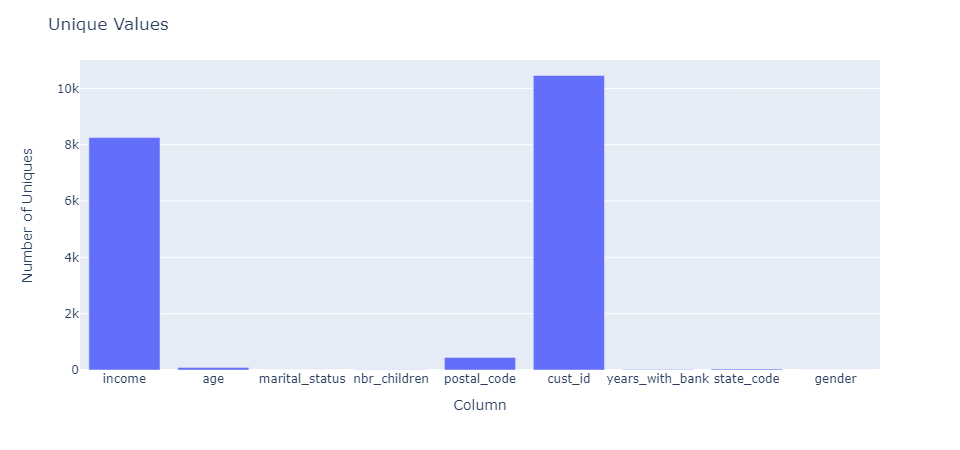

In [17]:
fig = px.bar(tdCustomer_bar_pd, x='xcol', y=["xunique"])
fig.update_layout(height=450, width=1100, title="Unique Values")
fig.update_xaxes(tickangle = 0, title="Column")   
fig.update_yaxes(title="Number of Uniques")   
fig.update_layout(showlegend=False)
fig

#### Stacked Bar Chart - Count, NULL, Unique, Blank, Zero, Positive and Negative Values

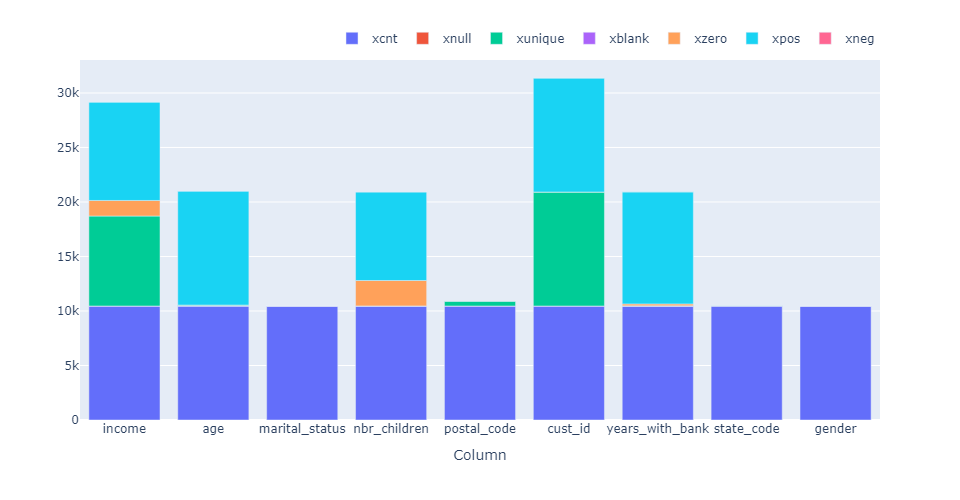

In [18]:
fig = px.bar(tdCustomer_bar_pd, x='xcol', y=["xcnt", "xnull", "xunique","xblank","xzero","xpos","xneg"])
fig.update_layout(height=500, width=1000)
fig.update_xaxes(tickangle = 0, title="Column")   
fig.update_yaxes(title="")   
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show() 

#### Horizontal Bar Chart - Count, NULL, Unique, Blank, Zero, Positive and Negative Values

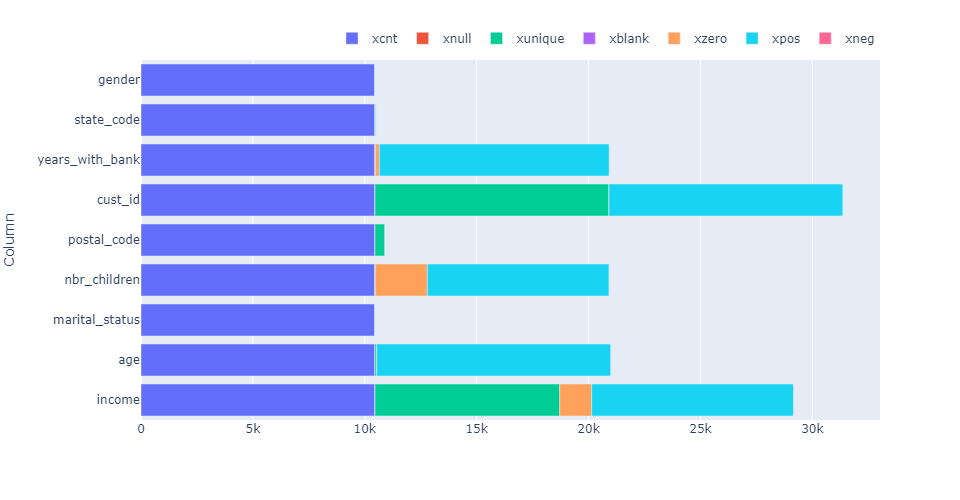

In [19]:
fig = px.bar(tdCustomer_bar_pd, x=["xcnt", "xnull", "xunique","xblank","xzero","xpos","xneg"], y='xcol')
fig.update_layout(height=500)
fig.update_yaxes(title="Column")   
fig.update_xaxes(title="") 
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show() 

In [20]:
# Example 2: Perform Values analysis on 'income' column with values grouped by 'gender' and only for rows with income greater than 0.
tdCustomer_val2 = valib.Values(data=tdCustomer, columns=["all"], group_columns="gender", filter="income > 0")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_val2.result.to_pandas().head(20)

xtype  \
gender xdb       xtbl     xcol                                                
F      Demo_user Customer state_code       VARCHAR(2) CHARACTER SET UNICODE   
                          income                              DECIMAL(15,1)   
M      Demo_user Customer cust_id                                   INTEGER   
                          marital_status   VARCHAR(1) CHARACTER SET UNICODE   
F      Demo_user Customer cust_id                                   INTEGER   
M      Demo_user Customer income                              DECIMAL(15,1)   
                          years_with_bank                           INTEGER   
                          nbr_children                              INTEGER   
                          state_code       VARCHAR(2) CHARACTER SET UNICODE   
F      Demo_user Customer nbr_children                              INTEGER   
                          age                                       INTEGER   
                          postal_code      VARCHAR(5) CHARACTER SET UNICODE   
                          marital_status   VARCHAR(1) CHARACTER SET UNICODE   
M      Demo_user Customer age                                       INTEGER   
F      Demo_user Customer years_with_bank                           INTEGER   
M      Demo_user Customer postal_code      VARCHAR(5) CHARACTER SET UNICODE   

                                             xcnt  xnull  xunique  xblank  \
gender xdb       xtbl     xcol                                              
F      Demo_user Customer state_code       5054.0    0.0     33.0     0.0   
                          income           5054.0    0.0   4640.0     NaN   
M      Demo_user Customer cust_id          3976.0    0.0   3976.0     NaN   
                          marital_status   3976.0    0.0      4.0     0.0   
F      Demo_user Customer cust_id          5054.0    0.0   5054.0     NaN   
M      Demo_user Customer income           3976.0    0.0   3669.0     NaN   
                          years_with_bank  3976.0    0.0     15.0     NaN   
                          nbr_children     3976.0    0.0      9.0     NaN   
                          state_code       3976.0    0.0     32.0     0.0   
F      Demo_user Customer nbr_children     5054.0    0.0      9.0     NaN   
                          age              5054.0    0.0     81.0     NaN   
                          postal_code      5054.0    0.0    326.0     0.0   
                          marital_status   5054.0    0.0      4.0     0.0   
M      Demo_user Customer age              3976.0    0.0     79.0     NaN   
F      Demo_user Customer years_with_bank  5054.0    0.0     15.0     NaN   
M      Demo_user Customer postal_code      3976.0    0.0    265.0     0.0   

                                            xzero    xpos  xneg  
gender xdb       xtbl     xcol                                   
F      Demo_user Customer state_code          NaN     NaN   NaN  
                          income              0.0  5054.0   0.0  
M      Demo_user Customer cust_id             0.0  3976.0   0.0  
                          marital_status      NaN     NaN   NaN  
F      Demo_user Customer cust_id             0.0  5054.0   0.0  
M      Demo_user Customer income              0.0  3976.0   0.0  
                          years_with_bank    60.0  3916.0   0.0  
                          nbr_children      805.0  3171.0   0.0  
                          state_code          NaN     NaN   NaN  
F      Demo_user Customer nbr_children     1015.0  4039.0   0.0  
                          age                 0.0  5054.0   0.0  
                          postal_code         NaN     NaN   NaN  
                          marital_status      NaN     NaN   NaN  
M      Demo_user Customer age                 0.0  3976.0   0.0  
F      Demo_user Customer years_with_bank    92.0  4962.0   0.0  
M      Demo_user Customer postal_code         NaN     NaN   NaN

#### 3-D Chart - Unique Values by Gender

In [21]:
def draw_3d_bar(data):
    unique_genders = data.reset_index().gender.unique()
    unique_xcols = data.reset_index()["xcol"].unique()
    x = [[data.loc[gender].at[col] for col in unique_xcols] for gender in unique_genders]
    #x = [[data.at[gender, col] for col in unique_xcols ] for gender in unique_genders]
    result = np.array(x, dtype=np.int)
    fig=plt.figure(figsize=(10, 12), dpi=500)
    ax1=fig.add_subplot(111, projection='3d')    
    xlabels = np.array(unique_xcols)
    xpos = np.arange(xlabels.shape[0])
    ylabels = tdCustomer_bar_pd["gender"].unique()
    ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False)
    zpos=result
    zpos = zpos.ravel()
    dx=1
    dy=.3
    dz=zpos
    ax1.w_xaxis.set_ticks(xpos )
    ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.)
    ax1.w_yaxis.set_ticklabels(ylabels)
    values = (dz-dz.min())/np.float_(dz.max()-dz.min())
    colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.title("Unique Values")
    plt.xticks(rotation=70)
    return plt

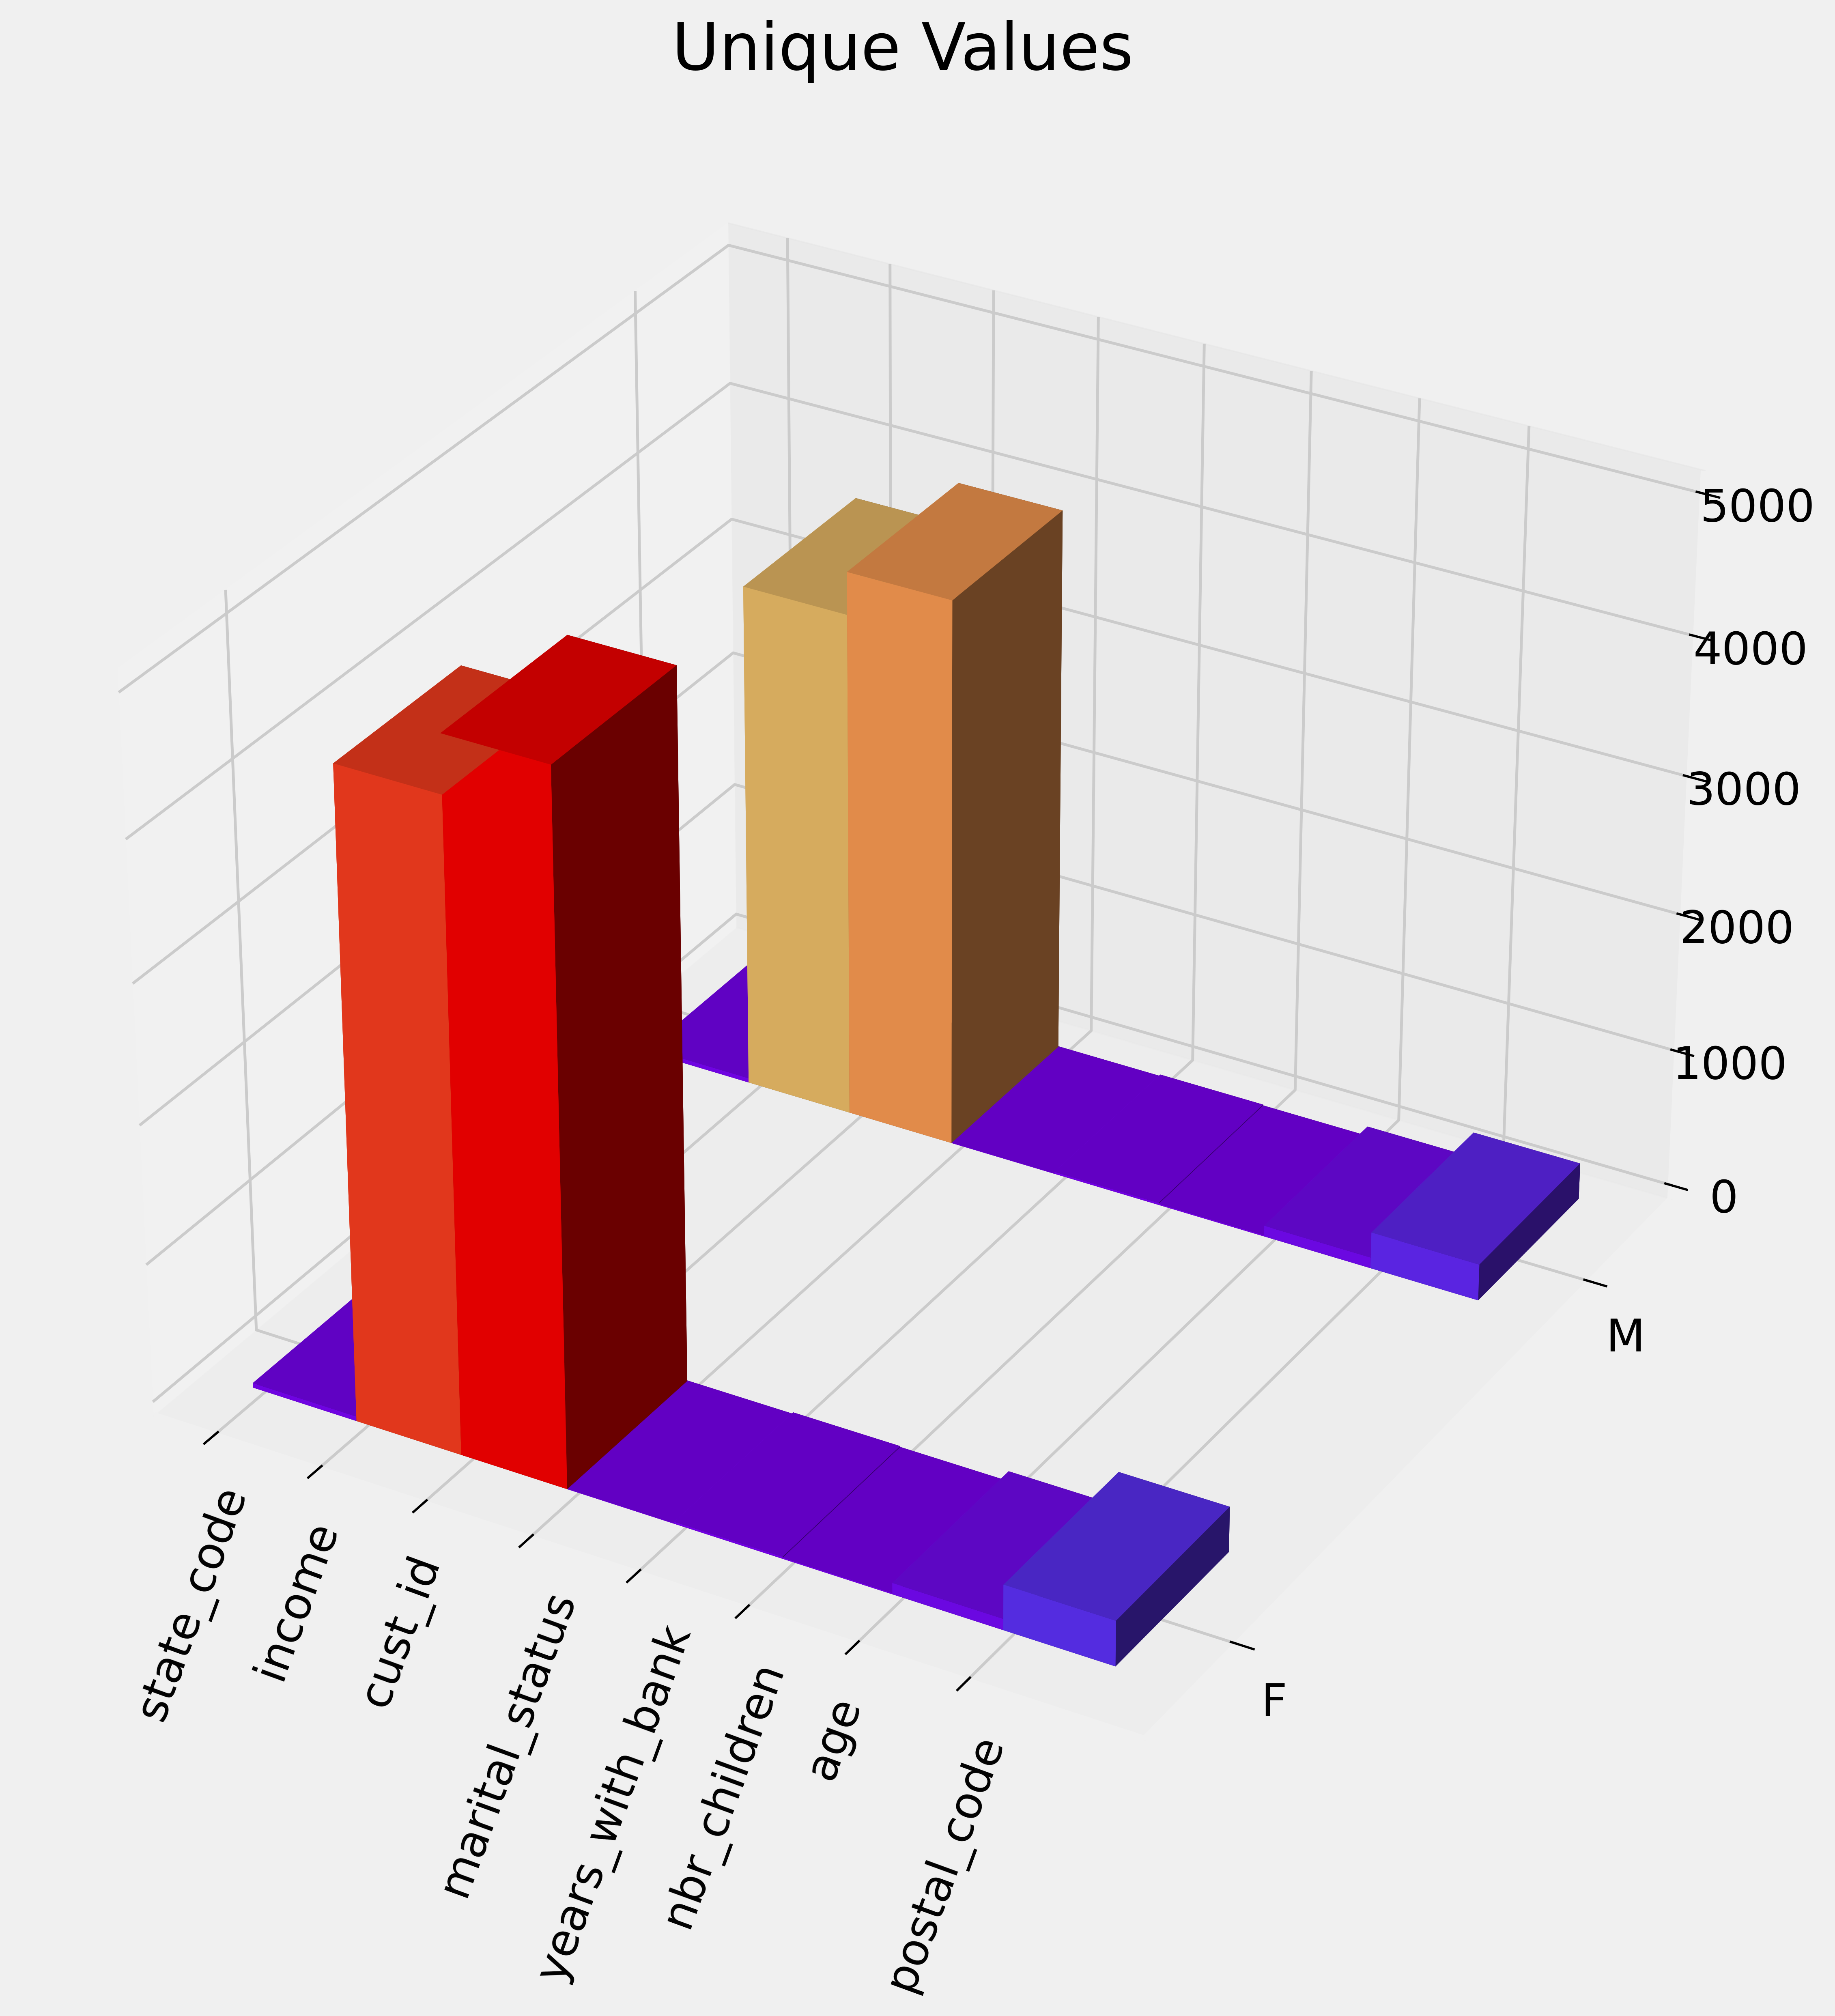

In [22]:
# Remove Index from Values plots data
tdCustomer_bar_pd = tdCustomer_val2.result.to_pandas().reset_index()
data = tdCustomer_val2.result.to_pandas().reset_index().set_index(["gender", "xcol"])["xunique"]
draw_3d_bar(data).show()

## Statistics Function

### SIGNATURE:
> valib.Statistics(data, columns=None, exclude_columns=None, extended_options='none', group_columns=None, statistical_method='population', stats_options=None, filter=None)

### DESCRIPTION:
Statistics analysis provides several common and not so common statistical measures for numeric data columns. Extended options include additional analyses and measures such as Values, Modes, Quantiles, and Ranks. Use statistical measures to understand the characteristics and properties of each numeric column, and to look for outlying values and anomalies.
Statistics analysis can be performed on columns of numeric or date data type. For columns of type DATE, statistics other than count, minimum, maximum, and mean are calculated by first converting to the number of days since 1900.

### PARAMETERS:
data:
Required Argument.
Specifies the input data to perform Statistics analysis.
Types: teradataml DataFrame

#### Columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all numeric and date columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allnumericanddate' - all numeric and date columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allnumericanddate' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### extended_options:
Optional Argument.
Specifies the extended options for calculating statistics.
Permitted Values: 
- 'all'
- 'none'
- 'modes'
- 'quantiles'
- 'values'
- 'rank'

Default Value: 'none'

Types: str OR list of Strings (str)

#### group_columns:
Optional Argument.
Specifies the name(s) of column(s) to perform separate analysis for each group.

Types: str OR list of Strings (str)

#### statistical_method:
Optional Argument.
Specifies the statistical method.
Permitted Values: 'sample', 'population'
Default Value: 'population'

Types: str

#### stats_options:
Optional Argument.
Specifies the basic statistics to be calculated.
Permitted Values: 
- all
- count (cnt)
- minimum (min)
- maximum (max)
- mean
- standarddeviation (std)
- skewness (skew)
- kurtosis (kurt)
- standarderror (ste)
- coefficientofvariance (cv)
- variance (var)
- sum
- uncorrectedsumofsquares (uss)
- correctedsumofsquares (css)

Default Value: ['cnt', 'min', 'max', 'mean', 'std']

Types: str OR list of Strings (str)

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Statistics.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Statistics.
Output teradataml DataFrames can be accessed using attribute references, such as StatisticsObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [23]:
# Example 1: First call the Statistics function on all numeric and date columns in the Customer table, taking basic statistics (min/max/mean/std).
tdCustomer_stats1 = valib.Statistics(data=tdCustomer, columns="allnumericanddate")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_stats1.result.to_pandas().head(10)

xcnt        xmin        xmax  \
xdb       xtbl     xcol                                               
Demo_user Customer income           10458.0         0.0    374808.2   
                   age              10458.0         9.0        94.0   
                   nbr_children     10458.0         0.0         8.0   
                   years_with_bank  10458.0         0.0        14.0   
                   cust_id          10458.0  13624800.0  31360385.0   

                                           xmean          xstd  
xdb       xtbl     xcol                                         
Demo_user Customer income           3.006627e+04  3.827622e+04  
                   age              4.433639e+01  1.926538e+01  
                   nbr_children     1.786288e+00  1.462653e+00  
                   years_with_bank  5.764773e+00  2.973770e+00  
                   cust_id          2.248935e+07  5.494394e+06

In [24]:
# Example 2: Next call the Statistics function on the same variables in the Customer table, generating all statistics, including the extended options.
tdCustomer_stats2 = valib.Statistics(data=tdCustomer, columns="allnumericanddate", stats_options="all", extended_options="all")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_stats2.result.to_pandas().head(10)

xcnt        xmin        xmax  \
xdb       xtbl     xcol                                               
Demo_user Customer income           10458.0         0.0    374808.2   
                   age              10458.0         9.0        94.0   
                   nbr_children     10458.0         0.0         8.0   
                   years_with_bank  10458.0         0.0        14.0   
                   cust_id          10458.0  13624800.0  31360385.0   

                                           xmean          xstd     xskew  \
xdb       xtbl     xcol                                                    
Demo_user Customer income           3.006627e+04  3.827622e+04  2.511663   
                   age              4.433639e+01  1.926538e+01  0.226521   
                   nbr_children     1.786288e+00  1.462653e+00  0.791973   
                   years_with_bank  5.764773e+00  2.973770e+00  0.203450   
                   cust_id          2.248935e+07  5.494394e+06  0.000001   

                                       xkurt          xste         xcv  \
xdb       xtbl     xcol                                                  
Demo_user Customer income           9.349902    374.286942  127.306171   
                   age             -0.755821      0.188388   43.452740   
                   nbr_children     0.558117      0.014303   81.882245   
                   years_with_bank -0.676731      0.029079   51.585210   
                   cust_id         -1.211969  53727.357792   24.431094   

                                            xvar  ...      xmax_5      xmax_4  \
xdb       xtbl     xcol                           ...                           
Demo_user Customer income           1.465069e+09  ...    331561.1    332404.8   
                   age              3.711548e+02  ...        90.0        91.0   
                   nbr_children     2.139353e+00  ...         4.0         5.0   
                   years_with_bank  8.843311e+00  ...        10.0        11.0   
                   cust_id          3.018837e+13  ...  31360293.0  31360316.0   

                                        xmax_3      xmax_2      xmax_1  \
xdb       xtbl     xcol                                                  
Demo_user Customer income             335909.6    369912.4    374808.2   
                   age                    92.0        93.0        94.0   
                   nbr_children            6.0         7.0         8.0   
                   years_with_bank        12.0        13.0        14.0   
                   cust_id          31360339.0  31360362.0  31360385.0   

                                    xmaxcnt_5 xmaxcnt_4  xmaxcnt_3  xmaxcnt_2  \
xdb       xtbl     xcol                                                         
Demo_user Customer income                 1.0       1.0        1.0        1.0   
                   age                   17.0      11.0        6.0       12.0   
                   nbr_children         751.0     348.0      114.0       49.0   
                   years_with_bank      613.0     374.0      182.0       45.0   
                   cust_id                1.0       1.0        1.0        1.0   

                                    xmaxcnt_1  
xdb       xtbl     xcol                        
Demo_user Customer income                 1.0  
                   age                    8.0  
                   nbr_children          10.0  
                   years_with_bank       39.0  
                   cust_id                1.0  

[5 rows x 77 columns]

#### Percentiles Plot

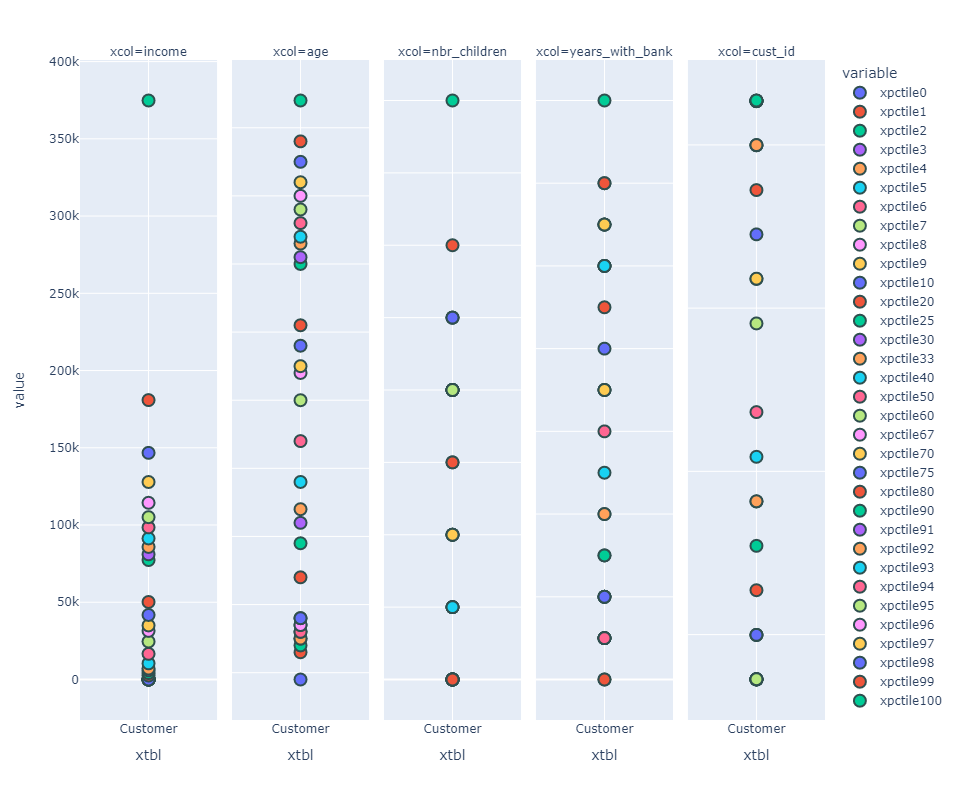

In [25]:
data = tdCustomer_stats2.result.to_pandas().reset_index()
fig = px.scatter(data, facet_col="xcol", x="xtbl",  y= [col for col in data.columns if 'xpctile' in col], height=800)
fig.update_yaxes(matches=None)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

In [26]:
# Example 3: Next call the Statistics function on the same variables in the Customer table, generating basic statistics, grouping by gender and filtering anyone with an income of 0.
tdCustomer_stats3 = valib.Statistics(data=tdCustomer, columns="allnumericanddate", group_columns="gender", filter="income > 0")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_stats3.result.to_pandas().head(20)

xcnt        xmin        xmax  \
gender xdb       xtbl     xcol                                              
F      Demo_user Customer cust_id          5054.0  13624810.0  31360385.0   
                          income           5054.0       297.4    265943.6   
M      Demo_user Customer cust_id          3976.0  13624800.0  31360339.0   
                          years_with_bank  3976.0         0.0        14.0   
                          nbr_children     3976.0         0.0         8.0   
                          income           3976.0       197.4    374808.2   
F      Demo_user Customer nbr_children     5054.0         0.0         8.0   
                          age              5054.0        14.0        94.0   
M      Demo_user Customer age              3976.0        14.0        93.0   
F      Demo_user Customer years_with_bank  5054.0         0.0        14.0   

                                                  xmean          xstd  
gender xdb       xtbl     xcol                                         
F      Demo_user Customer cust_id          2.248928e+07  5.494378e+06  
                          income           3.038010e+04  3.277318e+04  
M      Demo_user Customer cust_id          2.248957e+07  5.494447e+06  
                          years_with_bank  5.874748e+00  2.935920e+00  
                          nbr_children     1.912978e+00  1.526912e+00  
                          income           4.046579e+04  4.533547e+04  
F      Demo_user Customer nbr_children     1.888603e+00  1.471150e+00  
                          age              4.846379e+01  1.683140e+01  
M      Demo_user Customer age              4.890292e+01  1.739675e+01  
F      Demo_user Customer years_with_bank  5.793431e+00  3.023923e+00

### Plots
#### "Box and Whiskers" by Gender Plot

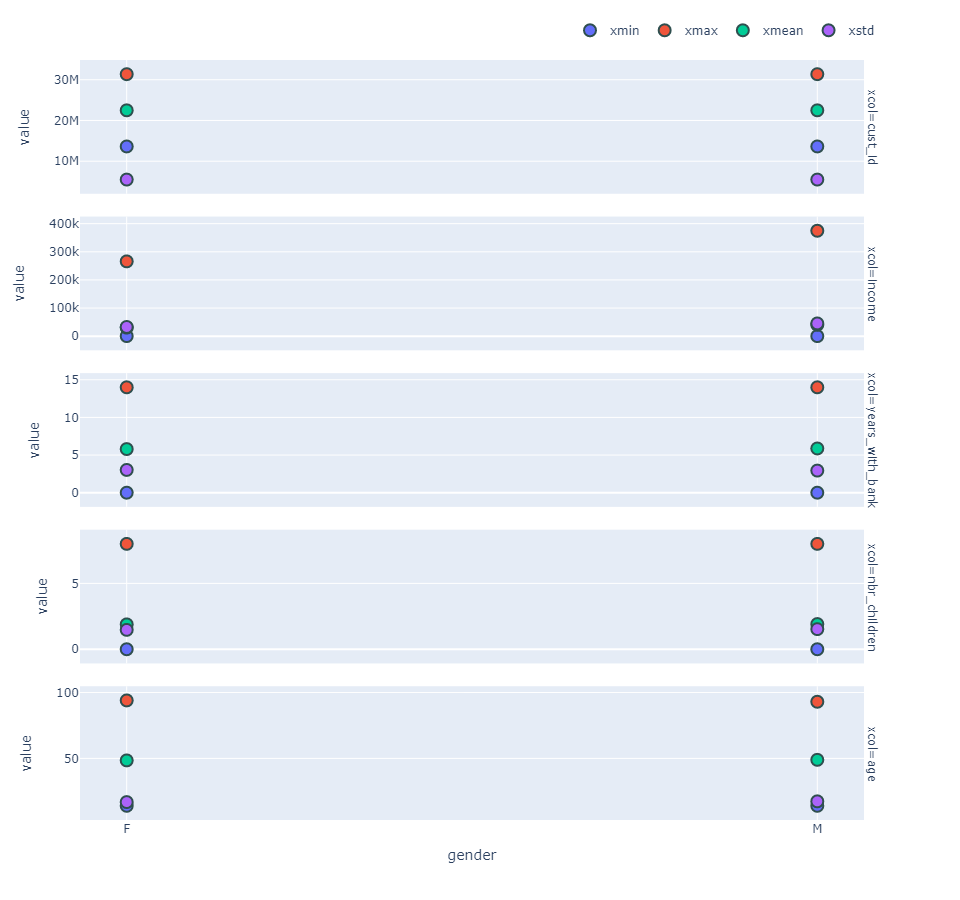

In [27]:
data = tdCustomer_stats3.result.to_pandas().reset_index()
fig = px.scatter(data, facet_row="xcol",  x="gender", y=["xmin","xmax","xmean", "xstd"], height=900)
fig.update_yaxes(matches=None)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

## Frequency Function

### SIGNATURE:
> valib.Frequency(data, columns=None, exclude_columns=None, cumulative_option=False, agg_filter=None, min_percentage=None, pairwise_columns=None, stats_columns=None, style="basic", top_n=None, filter=None)

### DESCRIPTION:
Frequency analysis counts the occurrences of individual data values in columns that contain categorical data. Frequency analysis is useful in understanding the meaning of a particular data element and can point out the need to recode some of the data values found, either permanently or in the course of building an analytic data set. This function is also useful in analyzing combinations of values occurring in two or more columns. 
A Frequency analysis calculates the number of occurrences of each value of the column or columns individually or in combination. Additionally, for each value, the percentage of rows in the selected DataFrame is provided in descending order starting with the most frequently occurring value. 

### PARAMETERS:
data:
Required Argument.
Specifies the input data to perform frequency analysis.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all character columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allcharacter' - all numeric and date columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allcharacter' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### cumulative_option:
Optional Argument.
Specifies whether to include rank, cumulative count, and cumulative percent information for each frequency value. When set to 'True', this information is included otherwise not.
Note:
    This argument should not be set to 'True' when style is 'pairwise'.
Default Value: False

Types: bool

#### agg_filter:
Optional Argument.
Specifies the clause to restrict returned aggregations.
For example,
    agg_filter="xpct > 1"
Note:
    This argument should not be used when "min_percentage" argument is used.

Types: str

#### min_percentage:
Optional Argument.
Specifies a value to determine whether to include only frequency values that occur a minimum percentage of the time. Setting this to 0 or 0.0 is equivalent to not including the argument at all. 

Types: float, int

#### pairwise_columns:
Optional Argument.
Specified the columns to be paired up with the frequency columns.
Note:
    Use only when "style" is set to 'pariwise'.

Types: str OR list of Strings (str)

#### stats_columns:
Optional Argument.
Specifies the name(s) of column(s) for which the minimum, maximum, mean value, and standard deviation are included in the result with the values computed over the rows corresponding to the individual values of the frequency columns.
Note:
    This argument can be used only when "style" is 'basic'.

Types: str OR list of Strings (str)

#### style:
Optional Argument.
Specifies the frequency style for the analysis.
Permitted Values:
- 'basic' - Counts frequencies of individual column values.
- 'pairwise' - Counts frequencies of pair-wise combinations of values of selected columns rather than individually. This should not be used when "cumulative_option" is set to 'True'.
- 'crosstab' - Counts frequencies of combinations of values of selected columns rather than individually.

Default Value: 'basic'

Types: str

#### top_n:
Optional Argument.
Specifies the number of frequency values to include. Using this argument shows frequency only for the number of top occurring values entered. 
Note:
    This argument is enabled only if "cumulative_option" is set to 'True'.

Types: int

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Frequency.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Frequency.
Output teradataml DataFrames can be accessed using attribute references, such as FrequencyObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [28]:
# Example 1: First call the Frequency function on the years_with_bank column in the Customer table.
tdCustomer_freq1 = valib.Frequency(data=tdCustomer, columns="years_with_bank")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_freq1.result.to_pandas().head(20)

xcnt       xpct
xtbl     xcol            xval                   
Customer years_with_bank 12     182.0   1.740295
                         14      39.0   0.372920
                         9      845.0   8.079939
                         3     1160.0  11.091987
                         13      45.0   0.430293
                         0      176.0   1.682922
                         4     1137.0  10.872060
                         11     374.0   3.576210
                         5     1190.0  11.378849
                         1      526.0   5.029642
                         2      888.0   8.491107
                         10     613.0   5.861541
                         8     1014.0   9.695927
                         6     1151.0  11.005928
                         7     1118.0  10.690381

### Box Plot - Number of years with the financial institution

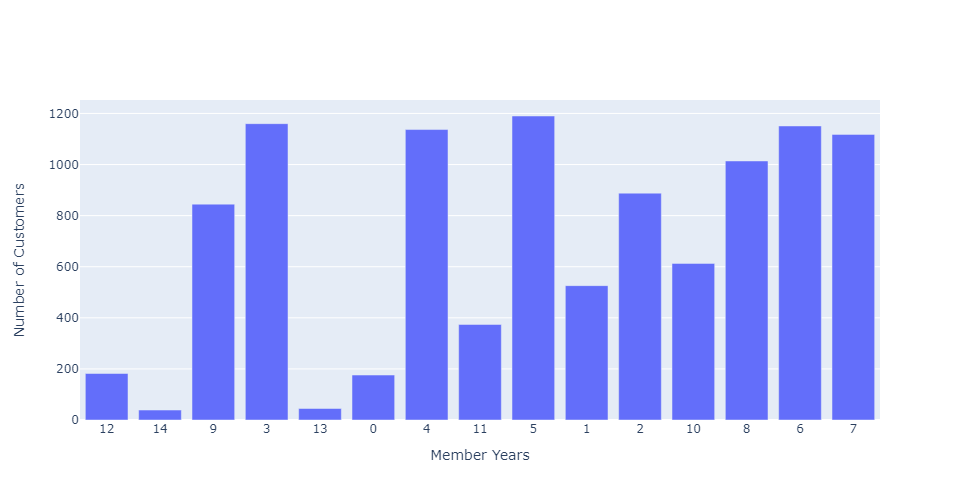

In [29]:
import plotly.graph_objs as go

data = tdCustomer_freq1.result.to_pandas().reset_index()

fig = go.Figure(data=[go.Bar(x=data.xval, y=data.xcnt)])
fig.update_layout(height=500)
fig.update_yaxes(title="Number of Customers")
fig.update_xaxes(title="Member Years", dtick=1)
fig.update_layout(showlegend=False)
fig.show() 

In [30]:
# Example 2: Next call the Frequency function on the gender and marital_status columns in the Customer table, generating a cross-tabulation.
tdCustomer_freq2 = valib.Frequency(data=tdCustomer, columns=["gender", "marital_status"], style="crosstab")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_freq2.result.to_pandas().head(20)

xcnt       xpct
gender marital_status                   
F      1               2226.0  21.285141
       2               2646.0  25.301205
M      2               2296.0  21.954485
F      4                560.0   5.354752
M      1               1638.0  15.662651
F      3                420.0   4.016064
M      3                252.0   2.409639
       4                420.0   4.016064

### Box Plot - Gender by Marital Status

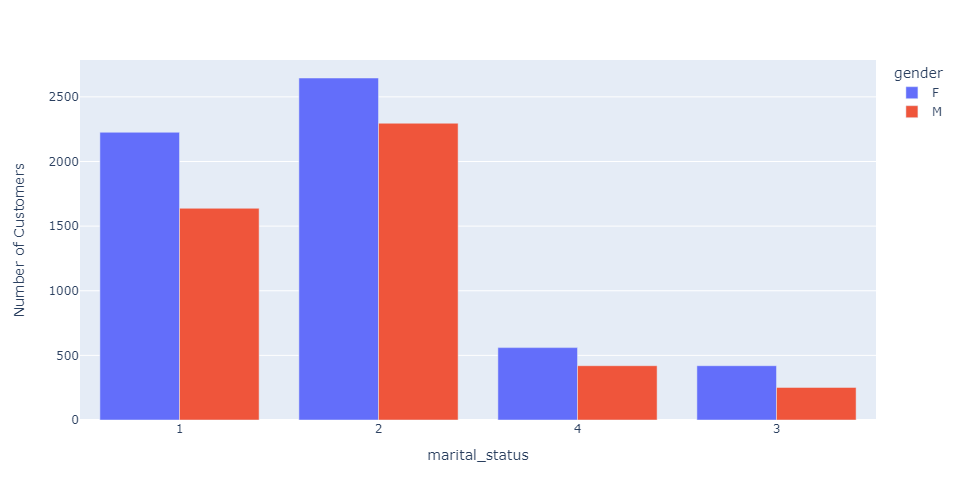

In [31]:
data = tdCustomer_freq2.result.to_pandas().reset_index()
# get center and width
fig = px.bar(data, x="marital_status", y="xcnt",
             color='gender', barmode='group',
             height=500)

fig.update_yaxes(title="Number of Customers")

fig.show()

### Box Plot - Marital Status by Gender

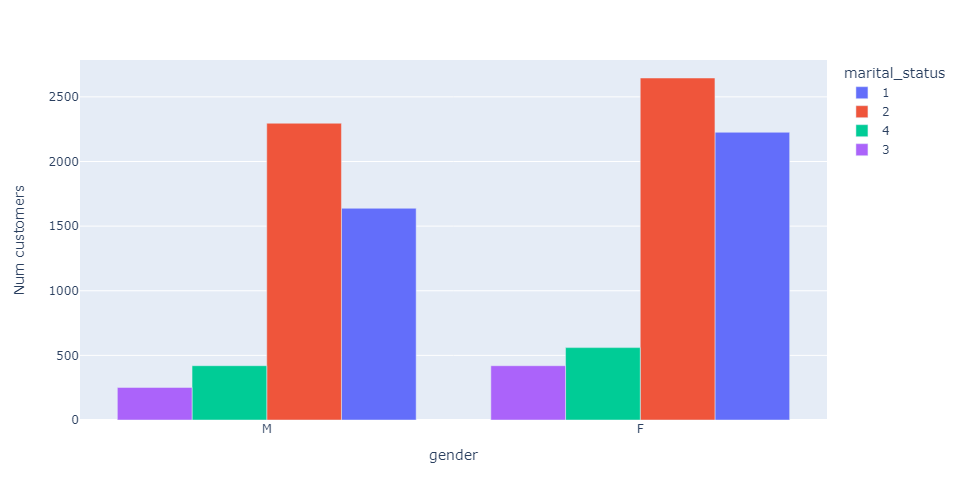

In [32]:
data = tdCustomer_freq2.result.to_pandas().reset_index()
# get center and widht
fig = px.bar(data, x="gender", y="xcnt",
             color='marital_status', barmode='group',
             height=500)

fig.update_yaxes(title="Num customers")

fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()

In [33]:
# Example 3: Next call the Frequency function on the state_code column in the Customer table, taking statistics on income.
tdCustomer_freq3 = valib.Frequency(data=tdCustomer, columns="state_code", stats_columns="income")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_freq3.result.to_pandas().head(50)

xcnt       xpct  xmin_income  xmax_income  \
xtbl     xcol       xval                                                
Customer state_code VA      70.0   0.669344          0.0     225534.4   
                    OK     224.0   2.141901          0.0     112860.8   
                    TN     252.0   2.409639       1124.8     205548.2   
                    HI     182.0   1.740295          0.0     103849.2   
                    OH     322.0   3.078983          0.0     169062.4   
                    NM      98.0   0.937082          0.0     159380.0   
                    OR     224.0   2.141901          0.0     146291.6   
                    FL     224.0   2.141901          0.0     288610.4   
                    MO     238.0   2.275770          0.0     179225.8   
                    IL     784.0   7.496653          0.0     335909.6   
                    AZ     336.0   3.212851          0.0     218712.0   
                    KS      42.0   0.401606          0.0      51966.2   
                    DC      84.0   0.803213       1761.5      67155.4   
                    TX    1162.0  11.111111          0.0     374808.2   
                    MD     112.0   1.070950          0.0     143158.6   
                    GA      28.0   0.267738       2372.2      77578.8   
                    CO     154.0   1.472557        840.6     248521.0   
                    WI     210.0   2.008032        464.0     241956.0   
                    NV      56.0   0.535475          0.0      67990.0   
                    NJ     168.0   1.606426          0.0     129040.6   
                    WA     126.0   1.204819       1207.3      80704.0   
                    KY     182.0   1.740295          0.0     113955.4   
                    IN     224.0   2.141901          0.0     174018.0   
                    LA      42.0   0.401606       1673.9      59235.8   
                    AL      56.0   0.535475       1649.4      39361.4   
                    PA     294.0   2.811245          0.0     223743.0   
                    MI     126.0   1.204819          0.0     198577.6   
                    NY    1498.0  14.323963          0.0     234644.8   
                    CA    2478.0  23.694779          0.0     332404.8   
                    NB      42.0   0.401606       2624.1      94458.0   
                    MN     182.0   1.740295          0.0     151364.2   
                    NC     126.0   1.204819        856.5     202090.2   
                    MA     112.0   1.070950          0.0     108290.0   

                          xmean_income   xstd_income  
xtbl     xcol       xval                              
Customer state_code VA    46076.702857  57621.290044  
                    OK    21036.735268  24375.662008  
                    TN    28472.663492  32040.450997  
                    HI    15677.484615  21641.469467  
                    OH    21638.146584  26078.252449  
                    NM    26978.917347  34725.080349  
                    OR    16353.408036  24154.386166  
                    FL    38774.348214  47838.489609  
                    MO    29935.244958  33307.699932  
                    IL    36907.453954  50081.273551  
                    AZ    30712.773810  34379.197988  
                    KS    12033.150000  14476.031429  
                    DC    22586.242857  16019.276711  
                    TX    34697.395267  46655.502401  
                    MD    28649.943750  33918.205582  
                    GA    27993.642857  21081.711425  
                    CO    31333.554545  43146.241835  
                    WI    27768.799048  37459.286544  
                    NV    19592.175000  20159.684210  
                    NJ    24440.998810  27981.736222  
                    WA    24925.124603  19459.314381  
                    KY    24930.871429  25440.881140  
                    IN    27219.521429  31555.337281  
                    LA    22701.990476  16161.700032  
                    AL    15880.569643  10

### Box Plot - Membership by State

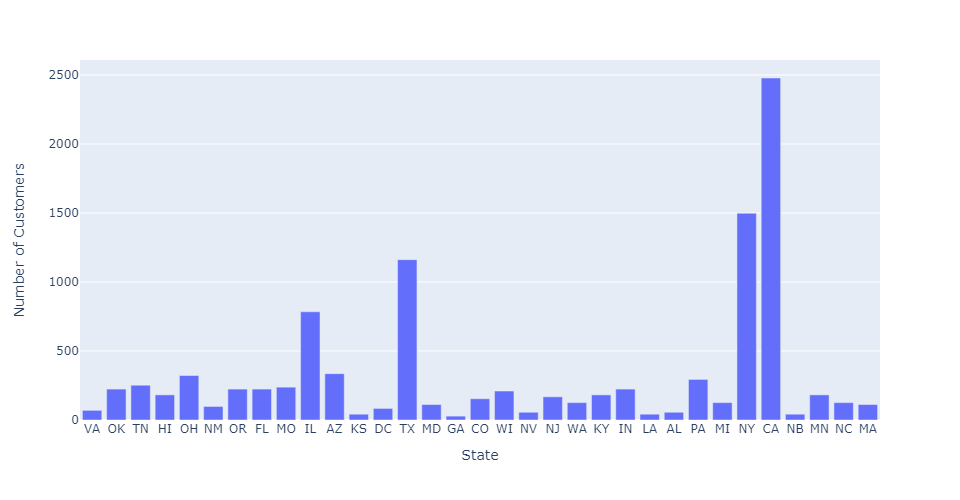

In [34]:
data = tdCustomer_freq3.result.to_pandas().reset_index()
# get center and widht
fig = px.bar(data, x="xval", y="xcnt",height=500)
fig.update_xaxes(title="State")
fig.update_yaxes(title="Number of Customers")
fig.show()

### Box Plot - "Box and Whiskers" Income Levels by State

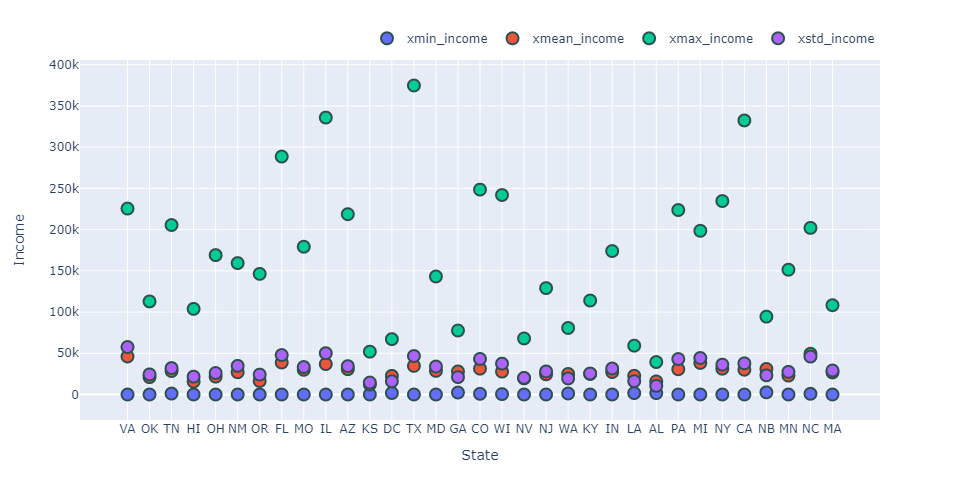

In [35]:
data = tdCustomer_freq3.result.to_pandas().reset_index()
fig = px.scatter(data, x="xval", y=["xmin_income","xmean_income","xmax_income","xstd_income"],height=500,width=1000)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.update_layout(legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_yaxes(title="Income")
fig.update_xaxes(title="State")

fig.show()

## Histogram Function

### SIGNATURE:
> valib.Histogram(data, columns=None, bins=10, bins_with_boundaries=None, boundaries=None, quantiles=10, widths=None, exclude_columns=None, overlay_columns=None, stats_columns=None, hist_style="basic", filter=None)

### DESCRIPTION:
Histogram analysis reveals the distribution of continuous numeric or date values in a column. Histogram analysis is also referred to as binning because it counts the occurrence of values in a series of numeric ranges called bins. The histogram analysis provides a number of ways to define bins, allowing multidimensional binning, overlaying of categorical data, and the calculation of numeric statistics within bins. If you set the desired number of equal sized data bins, the desired number of bins with a nearly equal number of values, a desired width, or the specific boundaries, the Histogram analysis separates the data to show its distributional properties. It does this by separating the data by bin number and gives counts and percentages over the requested rows. Percentages always sum to 100%. Separate options are available to specify a number of equal sized data bins in which the analysis determines the minimum and maximum value, as well as a user-specified minimum and maximum value. If the minimum and maximum are specified, all values less than the minimum are put in bin 0, while all values greater than the maximum are put in bin N+1. The same is true when the boundary option is specified. 
The Histogram analysis optionally provides subtotals within each bin of the count, percentage within the bin and percentage overall for each value or combination of values of one or more overlaid columns. Another option is provided to collect simple statistics for a binned column or another column of numeric or date type within the table, providing the minimum, maximum, mean, and standard deviation. When statistics are collected for a date type column, the standard deviation is given in units of days.Histogram analysis can be performed on columns of numeric or date data type.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to perform Histogram analysis.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) to analyze. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns, or all numeric and date columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns
    - 'allnumericanddate' - all numeric and date columns

Types: str OR list of Strings (str)

#### bins:
Optional Argument.
Specifies the number of equal width bins to create.
If multiple columns are requested, multiple bin sizes may be specified, such as bins = [5, 10]. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 bins.
Default Value: 10

Types: int OR list of Integers (int)

#### bins_with_boundaries:
Optional Argument.
Specifies the number of bins spanning a range specified by the minimum and maximum values.
For example, 
    bins_with_boundaries = [5,0,200] 
    creates 5 bins ranging from 0 to 200. 
If multiple columns are requested, multiple sets of parameters must be specified, such as bins_with_boundaries = ["{10, 0, 200000}", "{5, 0, 100}"]. Note that multiple values are provided as string with numbers enclosed in curly braces '{}'. Each such value corresponds to the value in "columns" argument.

Types: int, str OR list of Integers (int) or Strings (str)

#### boundaries:
Optional Argument.
Specifies the boundaries that define the bins.
For example, 
    boundaries = [0,50,100,150]
    provides 3 bins between 0 and 150 (0 to 50, 50 to 100, and 100 to 150). 
If multiple columns are requested, multiple sets of parameters must be specified, such as boundaries = ["{0, 50000, 100000, 150000}", "{0, 50, 100}"]. Note that multiple values are provided as string with numbers enclosed in curly braces '{}'. Each such value corresponds to the value in "columns" argument.

Types: int, str OR list of Integers (int) or Strings (str)

#### quantiles:
Optional Argument.
Specifies the number of approximately equally populated bins to create.
If multiple columns are requested, multiple quantile sizes may be specified, such as quantiles=5, 10. If fewer sizes are specified than columns, left-over columns are associated with the default size of 10 quantiles.
Default Value: 10

Types: int OR list of Integers (int)

#### widths: 
Optional Argument.
Specifies the width of the bins to create.
If multiple columns are requested, multiple widths must be specified, such as widths = [5, 10]. If fewer sizes are specified than columns, an error message displays.

Types: int OR list of Integers (int)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric', 'allnumericanddate' is used in the "columns" argument.

Types: str OR list of Strings (str)

#### overlay_columns:
Optional Argument.
Specifies a categorical variable with only a few values. If an overlay column is specified, frequencies within each bin are calculated for each value of that overlay column (frequencies for crosstabs of values are given if more than one overlay column is requested). 
Note:
    Use a specific column in either "overlay_columns" or "stats_columns", but not both.

Types: str OR list of Strings (str)

#### stats_columns:
Optional Argument.
Specifies a list of numeric columns/aliases for which simple statistics are calculated (minimum, maximum, mean and standard deviation) in each bin. This argument is not available for DATE columns.
Note:
    Use a specific column in either "overlay_columns" or "stats_columns", but not both.

Types: str OR list of Strings (str)

#### hist_style:
Optional Argument.
Specifies the histogram style to use for analysis.
Permitted Values:
- 'basic' - Creates a histogram for individual columns.
- 'crosstab' - Creates a multidimensional histogram by combining columns.
Default Value: 'basic'

Types: str

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for analysis within Histogram.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Histogram.
Output teradataml DataFrames can be accessed using attribute references, such as HistogramObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError

In [36]:
# Example 1: Perform Histogram analysis on income by specifying number of "bins" to show skewed distribution
tdCustomer_hist1 = valib.Histogram(data=tdCustomer, columns="income", bins=25)
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_hist1.result.to_pandas().head(25)

Empty DataFrame
Columns: []
Index: [(Demo_user, Customer, income, 21, 299846.56, 314838.888, 1.0, 0.009562057754828839), (Demo_user, Customer, income, 3, 29984.656, 44976.984, 1206.0, 11.53184165232358), (Demo_user, Customer, income, 25, 359815.872, 374808.2, 2.0, 0.019124115509657678), (Demo_user, Customer, income, 15, 209892.592, 224884.92, 17.0, 0.16255498183209027), (Demo_user, Customer, income, 23, 329831.216, 344823.544, 3.0, 0.02868617326448652), (Demo_user, Customer, income, 10, 134930.952, 149923.28, 66.0, 0.6310958118187033), (Demo_user, Customer, income, 7, 89953.968, 104946.296, 232.0, 2.2183973991202905), (Demo_user, Customer, income, 16, 224884.92, 239877.248, 9.0, 0.08605851979345955), (Demo_user, Customer, income, 22, 314838.888, 329831.216, 2.0, 0.019124115509657678), (Demo_user, Customer, income, 14, 194900.264, 209892.592, 23.0, 0.2199273283610633), (Demo_user, Customer, income, 17, 239877.248, 254869.576, 4.0, 0.038248231019315355), (Demo_user, Customer, income, 5, 59969.312, 74961.64, 522.0, 4.991394148020654), (Demo_user, Customer, income, 9, 119938.624, 134930.952, 109.0, 1.0422642952763435), (Demo_user, Customer, income, 8, 104946.296, 119938.624, 153.0, 1.4629948364888123), (Demo_user, Customer, income, 4, 44976.984, 59969.312, 773.0, 7.391470644482693), (Demo_user, Customer, income, 6, 74961.64, 89953.968, 344.0, 3.2893478676611205), (Demo_user, Customer, income, 20, 284854.232, 299846.56, 4.0, 0.038248231019315355), (Demo_user, Customer, income, 12, 164915.608, 179907.936, 42.0, 0.40160642570281124), (Demo_user, Customer, income, 2, 14992.328, 29984.656, 1882.0, 17.995792694587877), (Demo_user, Customer, income, 19, 269861.904, 284854.232, 3.0, 0.02868617326448652), (Demo_user, Customer, income, 11, 149923.28, 164915.608, 47.0, 0.4494167144769554), (Demo_user, Customer, income, 13, 179907.936, 194900.264, 32.0, 0.30598584815452284), (Demo_user, Customer, income, 18, 254869.576, 269861.904, 8.0, 0.07649646203863071), (Demo_user, Customer, income, 1, 0.0, 14992.328, 4974.0, 47.56167527251865)]

### Histogram of Income - 25 even width bins

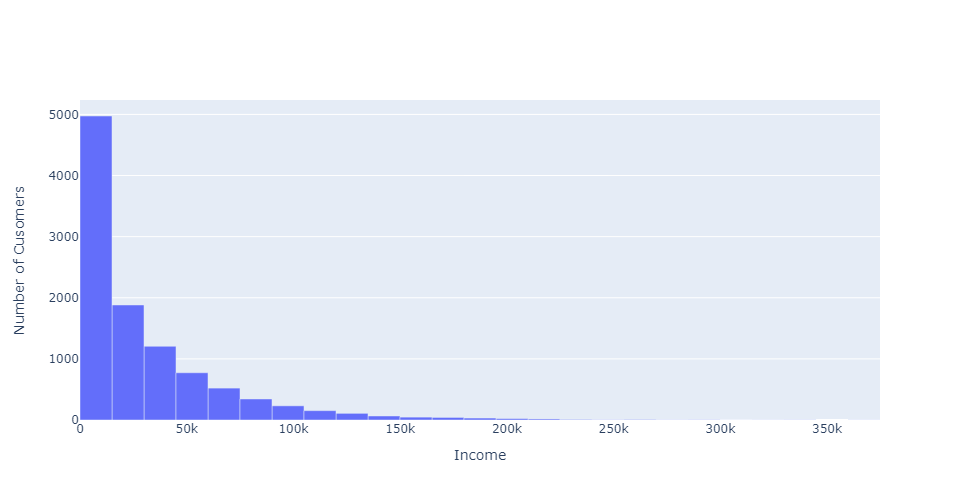

In [37]:
data = tdCustomer_hist1.result.to_pandas().reset_index()
data["xcenter"] =  (data.xend + data.xbeg) / 2
data["xwidth"] =  data.xend - data.xbeg
fig = go.Figure(data=[go.Bar(x=data.xcenter, y=data.xcnt, width=data.xwidth)])

fig.update_layout(height=500)
fig.update_yaxes(title="Number of Cusomers")
fig.update_xaxes(title="Income")
fig.update_layout(showlegend=False)
fig.show() 

In [38]:
# Example 2: Perform Histogram analysis on income using "quantiles" to show skewed distribution
tdCustomer_hist2 = valib.Histogram(data=tdCustomer, columns="income", quantiles=25)
# Print the results.
# Using to_pandas() for a cleaner display format
tdCustomer_hist2.result.to_pandas().head(25)

Empty DataFrame
Columns: []
Index: [(Demo_user, Customer, income, 5, 1369.6, 2564.4, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 24, 85826.0, 114388.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 6, 2567.8, 3859.2, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 16, 24596.0, 28402.0, 419.0, 4.006502199273283), (Demo_user, Customer, income, 20, 43456.0, 50180.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 10, 8424.0, 10443.5, 420.0, 4.016064257028113), (Demo_user, Customer, income, 15, 20996.8, 24582.6, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 1, 0.0, 0.0, 1428.0, 13.654618473895582), (Demo_user, Customer, income, 18, 32581.0, 37763.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 23, 69582.0, 85820.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 12, 12712.0, 15351.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 7, 3861.3, 5184.4, 419.0, 4.006502199273283), (Demo_user, Customer, income, 13, 15355.6, 17952.2, 419.0, 4.006502199273283), (Demo_user, Customer, income, 8, 5187.6, 6591.3, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 9, 6605.0, 8423.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 22, 58834.0, 69515.2, 419.0, 4.006502199273283), (Demo_user, Customer, income, 25, 114448.0, 374808.2, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 14, 17954.3, 20996.7, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 11, 10444.5, 12710.0, 417.0, 3.987378083763626), (Demo_user, Customer, income, 17, 28409.7, 32552.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 21, 50191.9, 58806.0, 418.0, 3.9969401415184547), (Demo_user, Customer, income, 4, 197.4, 1363.5, 246.0, 2.3522662076878946), (Demo_user, Customer, income, 19, 37770.0, 43449.3, 419.0, 4.006502199273283)]

### Histogram of Income - 25 Quantile bins

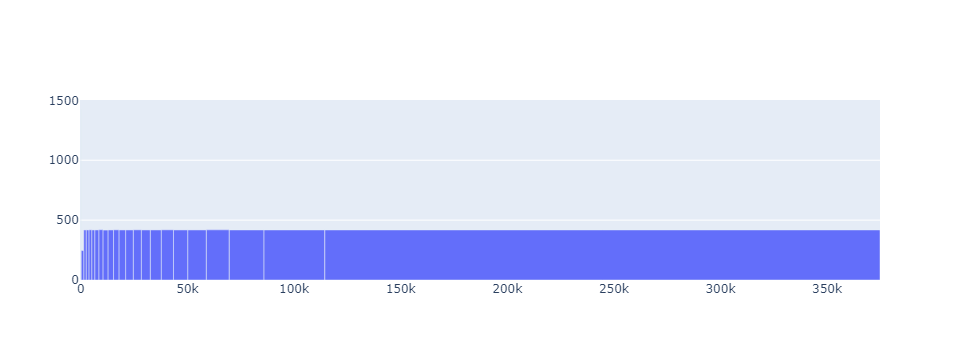

In [39]:
data = tdCustomer_hist2.result.to_pandas().reset_index()
# get center and widht
income_center = (data.xend + data.xbeg) / 2
income_width = data.xend - data.xbeg
count = data.xcnt
fig = go.Figure(data=[go.Bar(x=income_center, y=count, width=income_width)])
fig.show()

In [40]:
# Example 3: Perform Histogram analysis on age, overlayed by state_code
tdCustomer_hist3 = valib.Histogram(data=tdCustomer, columns="income", bins=25, overlay_columns="state_code")
# Print the results
# Using to_pandas() for a cleaner display format
tdCustomer_hist3.result.to_pandas().head(25)

xocnt  \
xdb       xtbl     xcol   xbin xbeg       xend       xcnt   xpct      ovly_state_code          
Demo_user Customer income 4    44976.984  59969.312  773.0  7.391471  TX                86.0   
                          2    14992.328  29984.656  1882.0 17.995793 MO                48.0   
                          9    119938.624 134930.952 109.0  1.042264  IL                14.0   
                          6    74961.640  89953.968  344.0  3.289348  CO                 4.0   
                          2    14992.328  29984.656  1882.0 17.995793 LA                14.0   
                          8    104946.296 119938.624 153.0  1.462995  AZ                 4.0   
                          5    59969.312  74961.640  522.0  4.991394  IN                15.0   
                          18   254869.576 269861.904 8.0    0.076496  TX                 2.0   
                          19   269861.904 284854.232 3.0    0.028686  CA                 1.0   
                          3    29984.656  44976.984  1206.0 11.531842 OR                16.0   
                          6    74961.640  89953.968  344.0  3.289348  MD                 6.0   
                          1    0.000      14992.328  4974.0 47.561675 FL                89.0   
                          10   134930.952 149923.280 66.0   0.631096  IL                10.0   
                          9    119938.624 134930.952 109.0  1.042264  MI                 2.0   
                          10   134930.952 149923.280 66.0   0.631096  PA                 1.0   
                          6    74961.640  89953.968  344.0  3.289348  NC                 9.0   
                          15   209892.592 224884.920 17.0   0.162555  FL                 1.0   
                          25   359815.872 374808.200 2.0    0.019124  TX                 2.0   
                          5    59969.312  74961.640  522.0  4.991394  NY                81.0   
                          1    0.000      14992.328  4974.0 47.561675 NY               679.0   
                          6    74961.640  89953.968  344.0  3.289348  MO                 8.0   
                          19   269861.904 284854.232 3.0    0.028686  TX                 1.0   
                          8    104946.296 119938.624 153.0  1.462995  TX                20.0   
                          1    0.000      14992.328  4974.0 47.561675 WA                50.0   
                          8    104946.296 119938.624 153.0  1.462995  VA                 3.0   

                                                                                           xobpct  \
xdb       xtbl     xcol   xbin xbeg       xend       xcnt   xpct      ovly_state_code               
Demo_user Customer income 4    44976.984  59969.312  773.0  7.391471  TX                11.125485   
                          2    14992.328  29984.656  1882.0 17.995793 MO                 2.550478   
                          9    119938.624 134930.952 109.0  1.042264  IL                12.844037   
                          6    74961.640  89953.968  344.0  3.289348  CO                 1.162791   
                          2    14992.328  29984.656  1882.0 17.995793 LA                 0.743889   
                          8    104946.296 119938.624 153.0  1.462995  AZ                 2.614379   
                          5    59969.312  74961.640  522.0  4.991394  IN                 2.873563   
                          18   254869.576 269861.904 8.0    0.076496  TX                25.000000   
                          19   269861.904 284854.232 3.0    0.028686  CA                33.333333   
                          3    29984.656  44976.984  1206.0 11.531842 OR                 1.326700   
                          6    74961.640  89953.968  344.0  3.289348  MD                 1.744186   
                          1    0.000      14992.328  4974.0 47.561675 FL                 1.789304   
                          10   134930.952 149923.280 66.0   0.631096  IL        

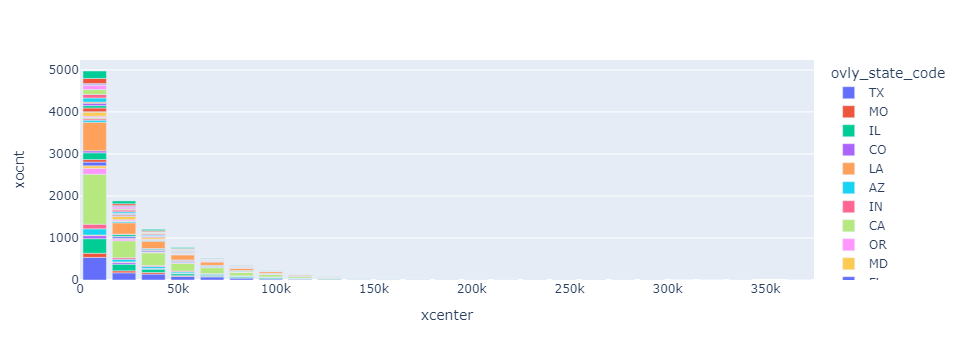

In [41]:
data = tdCustomer_hist3.result.to_pandas().reset_index()
# get center and widht
data["xcenter"] =  (data.xend + data.xbeg) / 2
data["xwidth"] =  data.xend - data.xbeg
fig = px.bar(data, x="xcenter", y="xocnt", color="ovly_state_code")
fig.show()


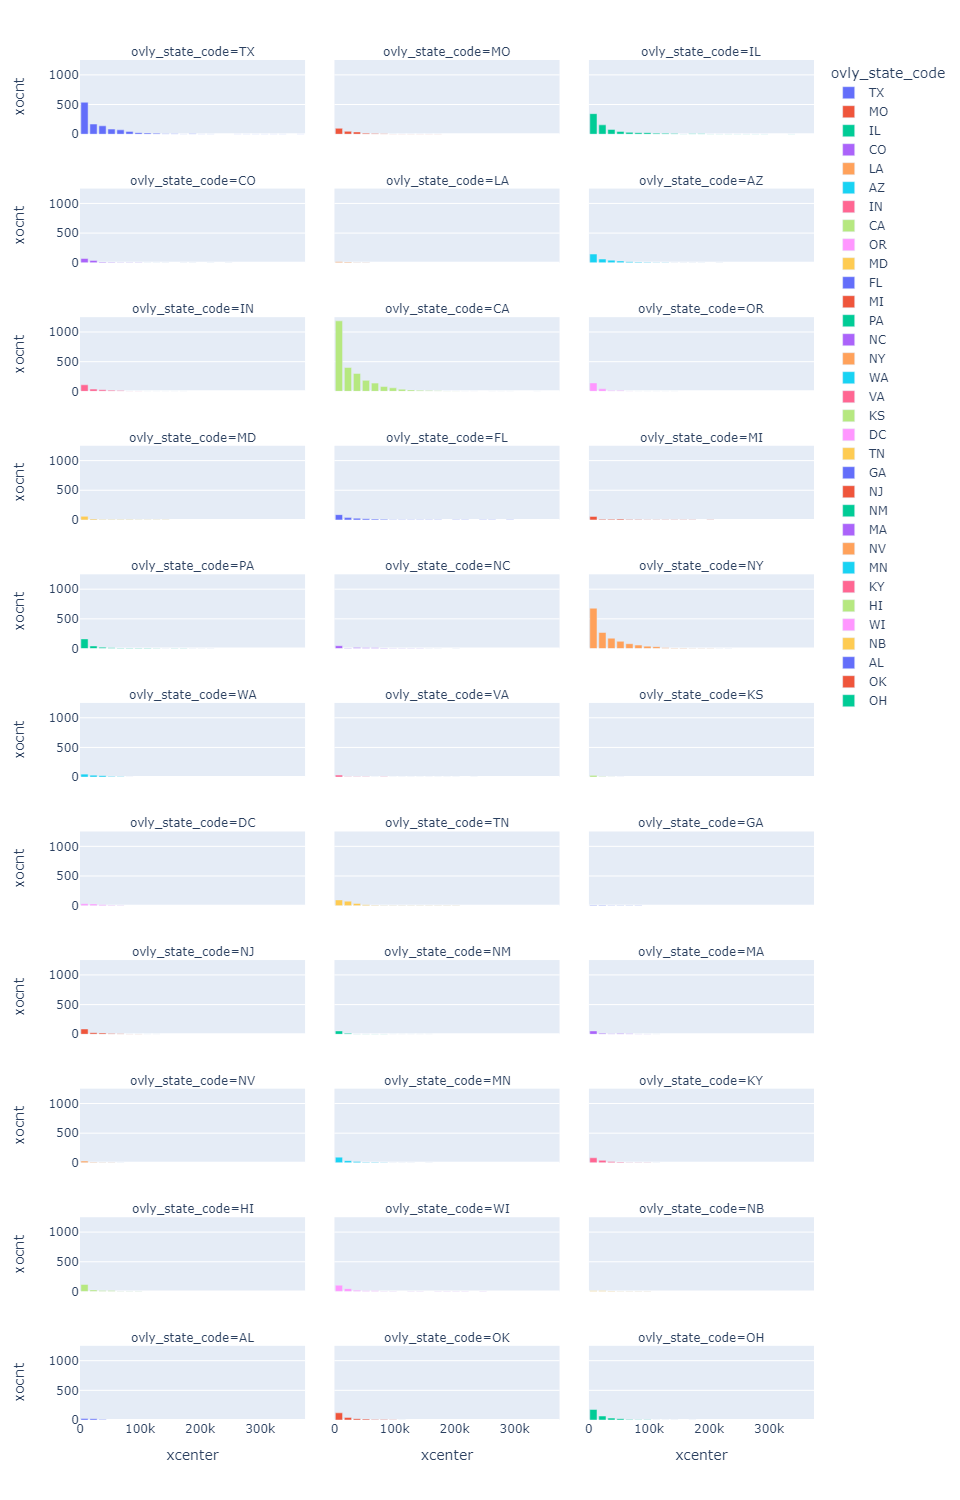

In [42]:
data = tdCustomer_hist3.result.to_pandas().reset_index()
# get center and widht
data["xcenter"] =  (data.xend + data.xbeg) / 2
data["xwidth"] =  data.xend - data.xbeg
fig = px.bar(data, x="xcenter", y="xocnt", facet_col="ovly_state_code", color="ovly_state_code", facet_col_wrap=3,
              facet_row_spacing=0.04, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.04, # default is 0.03
              height=1500, width=1200,)
fig.show()

# Data Preparation

## Transform Function

### SIGNATURE:
>valib.Transform(data, bins=None, derive=None, one_hot_encode=None, fillna=None, label_encode=None, rescale=None, retain=None, sigmoid=None, zscore=None, fallback=False, index_columns=None, unique_index=False, key_columns=None, allow_duplicates=None, nopi=None, filter=None)

### DESCRIPTION:

The Variable Transformation analysis reads a teradataml DataFrame and produces an output containing transformed columns. This is useful when preparing data for input to an analytic algorithm. For example, a K-Means Clustering algorithm typically produces better results when the input columns are first converted to their Z-Score values to put all input variables on an equal footing, regardless of their magnitude. 
Function supports following transformations:

- Binning – Binning replaces a continuous numeric column with a categorical one to produce ordinal values (for example, numeric categorical values where order is meaningful).
- Derive – The Derive transformation requires the free-form transformation be specified as a formula.
- One Hot Encoding – One Hot Encoding is useful when a categorical data element must be re-expressed as one or more numeric data elements, creating a binary numeric field for each categorical data value.
- Missing Value Treatment or Null Replacement.
- Label Encoding – Allows to re-express existing values of a categorical data column (variable) into a new coding scheme or to correct data quality problems and focus an analysis on a value.
- Min-Max Scaling – Limits the upper and lower boundaries of the data in a continuous numeric column using a linear rescaling function based on maximum and minimum data values.
- Retain - Allows copying of one or more columns into the final analytic data set.
- Sigmoid – Provides rescaling of continuous numeric data using a type of sigmoid or s-shaped function.
- ZScore – Provides rescaling of continuous numeric data using Z-Scores.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to perform variable transformations.

Types: teradataml DataFrame

#### bins:
Optional Argument.
Specifies one or more instances of Binning Transformation. Binning replaces a continuous numeric column with a categorical one to produce ordinal values (for example, numeric categorical values where order is meaningful). Check the documentation of 'teradataml.analytics.Transformation.Binning' to know more about Binning.

Types: Binning OR List of Binning

#### derive:
Optional Argument.
Specifies one or more instances of Derive Transformation. This argument allows user to perform a free form transformation using arithmetic formula. Check the documentation of 'teradataml.analytics.Transformation.Derive' to know more about Derive.

Types: Derive OR List of Derive

#### one_hot_encode:
Optional Argument.
Specifies one or more instances of OneHotEncoder Transformation. One hot encoding allows user to re-express categorical data as one or more numeric data elements, creating a binary numeric field for each categorical data value. Check the documentation of 'teradataml.analytics.Transformation.OneHotEncoder' to know more about OneHotEncoder.

Types: OneHotEncoder OR List of OneHotEncoder

#### fillna:
Optional Argument.
Specifies one or more instances of FillNa Transformation. This argument allows user to perform a missing value/null replacement transformation. Check the documentation of 'teradataml.analytics.Transformation.FillNa' to know more about FillNa.

Types: FillNa OR List of FillNa

#### label_encode:
Optional Argument.
Specifies one or more instances of LabelEncoder Transformation. This allows to re-express existing values of a categorical data column (variable) into a new coding scheme. Check the documentation of 'teradataml.analytics.Transformation.LabelEncoder' to know more about LabelEncoder.

Types: LabelEncoder OR List of LabelEncoder

#### rescale:
Optional Argument.
Specifies one or more instances of MinMaxScalar Transformation. This limits the upper and lower boundaries of the data in a continuous numeric column using a linear rescaling function based on maximum and minimum data values. Check the documentation of 'teradataml.analytics.Transformation.MinMaxScalar' to know more about MinMaxScalar.

Types: MinMaxScalar OR List of MinMaxScalar

#### retain:
Optional Argument.
Specifies one or more instances of Retain Transformation. This argument allows user to retain columns from input to output. Check the documentation of 'teradataml.analytics.Transformation.Retain' to know more about Retain.

Types: Retain OR List of Retain

#### sigmoid:
Optional Argument.
Specifies one or more instances of Sigmoid Transformation. This argument allows user to perform a rescaling using sigmoid transformation. Check the documentation of 'teradataml.analytics.Transformation.Sigmoid' to know more about Sigmoid.

Types: Sigmoid OR List of Sigmoid

#### zscore:
Optional Argument.
Specifies one or more instances of ZScore Transformation. This argument allows user to perform a rescaling using Z-Score transformation. Check the documentation of 'teradataml.analytics.Transformation.ZScore' to know more about ZScore.

Types: ZScore OR List of ZScore

#### fallback:
Optional Argument.
Specifies whether a mirrored copy of underlying table of output DataFrame is required or not.
Default Value: False

Types: bool

#### index_columns:
Optional Argument.
Specifies the name(s) of the output column(s) to be used as index in output DataFrame.

Types: str OR List of Strings (str)

#### unique_index:
Optional Argument.
Specifies whether the underlying output table should contain a unique primary index or not.
Default Value: False

Types: bool

#### key_columns:
Optional Argument.
Specifies the name(s) of the column(s) that can be unique key in input and output teradataml DataFrame. When null replacement is requested, i.e., "fillna" argument is used either in FillNa transformation or in combination with a Binning, Derive, OneHotEncoder, LabelEncoder, MinMaxScalar, Sigmoid, or ZScore transformation, the "key_columns" argument must be specified.

Types: str OR List of Strings (str)

#### allow_duplicates:
Optional Argument.
Specifies whether output should contain duplicate rows or not.

Types: bool

#### nopi:
Optional Argument.
Specifies whether the underlying output table should contain no index columns. When True, output table does not contain index columns.
Note:
    When this argument is set to True, "allow_duplicates" must also be set to True.

Types: bool

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for transformation.
For example,
    filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Transform.
Output teradataml DataFrames can be accessed using attribute references, such as TransformObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError


In [43]:
# First, grab customer demographic variables and create binned variables and one-hot encoded variables from the customer table.

fn = FillNa(style = "median")

income_t = Binning(style = "bins", value = 100, columns = "income", out_columns = "income_bins", fillna = fn)
age_t = Binning(style = "bins", value = 10, columns = "age", out_columns = "age_bins", fillna = fn)
gender_t = OneHotEncoder(values = {"M":"male_ind", "F":"female_ind"}, columns = "gender", fillna = fn)
marital_status_t = OneHotEncoder(values = {1:"single_ind", 2:"married_ind", 3:"separated_ind", 4:"widower_ind"}, 
                                 columns = "marital_status", fillna = fn)
state_code_t = OneHotEncoder(values = {"CA":"ca_resident_ind", "NY":"ny_resident_ind", 
                                       "TX":"tx_resident_ind", "IL":"il_resident_ind",
                                       "AZ":"az_resident_ind", "OH":"oh_resident_ind"}, 
                             columns = "state_code", fillna = fn)
fillna_t1 = FillNa(style = "median", columns = "years_with_bank", out_columns = "tot_cust_years", datatype = 'integer')
fillna_t2 = FillNa(style = "median", columns = "nbr_children", out_columns = "tot_children", datatype = 'integer')
labelencoder_t = LabelEncoder(values={"CA": "CA", "NY": "NY", "TX": "TX", "OH": "OH", "AZ": "AZ", "IL": "IL"}, 
                              columns="state_code", default="OTHER", datatype = 'char,6')

cust = valib.Transform(data = tdCustomer,
                       bins = [income_t, age_t],
                       one_hot_encode = [gender_t, marital_status_t, state_code_t],
                       fillna = [fillna_t1, fillna_t2],
                       label_encode = labelencoder_t,
                       key_columns = "cust_id")

cust.result.to_pandas().head(5)

income_bins  age_bins  male_ind  female_ind  single_ind  \
cust_id                                                             
25902814            1         5         0           1           1   
23175148            4         4         0           1           0   
28620753            1         1         1           0           1   
24526440           15         4         0           1           0   
25897247            1         8         0           1           0   

          married_ind  separated_ind  widower_ind  ca_resident_ind  \
cust_id                                                              
25902814            0              0            0                1   
23175148            1              0            0                0   
28620753            0              0            0                0   
24526440            0              0            1                1   
25897247            1              0            0                0   

          ny_resident_ind  tx_resident_ind  il_resident_ind  az_resident_ind  \
cust_id                                                                        
25902814                0                0                0                0   
23175148                0                0                0                0   
28620753                0                0                0                0   
24526440                0                0                0                0   
25897247                1                0                0                0   

          oh_resident_ind  tot_cust_years  tot_children          state_code  
cust_id                                                                      
25902814                0               8             0  CA                  
23175148                0               5             2  OTHER               
28620753                0               8             1  OTHER               
24526440                0               6             5  CA                  
25897247                0               7             0  NY

In [44]:
# Next, create account indicators and then calculate account balances

fn = FillNa(style = "literal", value=0)

account_type_t = OneHotEncoder(values = {"CC":"cc_acct_ind", "CK":"ck_acct_ind", 
                                         "SV":"sv_acct_ind"}, 
                               columns = "acct_type", fillna = fn)
fillna_t = FillNa(style = "median", columns = ["cust_id", "starting_balance", "ending_balance"])

acct = valib.Transform(data = tdAccounts,
                       one_hot_encode = [account_type_t],
                       fillna = fillna_t,
                       key_columns = "cust_id")

acct_bal = acct.result.starting_balance + acct.result.ending_balance

acct.result = acct.result.assign(cc_bal = case_when( [(acct.result.cc_acct_ind.expression == 1, acct_bal.expression)
                                                     ], else_=0 )
                        ).assign(ck_bal = case_when( [(acct.result.ck_acct_ind.expression == 1, acct_bal.expression)
                                                     ], else_=0 )
                        ).assign(sv_bal = case_when( [(acct.result.sv_acct_ind.expression == 1, acct_bal.expression)
                                                     ], else_=0 )
                        )

acct.result.to_pandas().head(5)

acct_nbr  cc_acct_ind  ck_acct_ind  sv_acct_ind     cust_id  \
0  456114321362917423            1            0            0  31347091.0   
1  000000001363158310            1            0            0  13631580.0   
2  000000001362897221            0            1            0  28620837.0   
3  456114321362580422            1            0            0  29976760.0   
4  456114321362917423            0            1            0  31347091.0   

   starting_balance  ending_balance     cc_bal   ck_bal  sv_bal  
0            11.000         6890.00   6901.000     0.00     0.0  
1          1470.562         8629.74  10100.302     0.00     0.0  
2           173.120           11.33      0.000   184.45     0.0  
3           493.856        13650.00  14143.856     0.00     0.0  
4            11.000         6890.00      0.000  6901.00     0.0

In [45]:
# Next get the transaction information required for the Quarterly aggregation by pulling out the quarter the transaction was made.

acct_mon = extract('month', tdTransactions.tran_date.expression).expression

trans = tdTransactions.assign(q1_trans = case( [(acct_mon ==  "1", 1), (acct_mon ==  "2", 1), (acct_mon ==  "3", 1)], else_ = 0 ),
                              q2_trans = case( [(acct_mon ==  "4", 1), (acct_mon ==  "5", 1), (acct_mon ==  "6", 1)], else_ = 0 ),
                              q3_trans = case( [(acct_mon ==  "7", 1), (acct_mon ==  "8", 1), (acct_mon ==  "9", 1)], else_ = 0 ),
                              q4_trans = case( [(acct_mon == "10", 1), (acct_mon == "11", 1), (acct_mon == "12", 1)], else_ = 0 ),
                             )
trans.to_pandas().head(5)

tran_amt principal_amt interest_amt new_balance  \
tran_id acct_nbr                                                             
286     000000001362735313    71.07        116.07        0.000      642.55   
88      000000001363014322     0.22          9.00        0.167      172.85   
117     000000001363252313     0.23         45.00        0.345      181.30   
17      000000001362508317   182.70        258.70        0.000      304.34   
1512    000000001363046221     0.00          9.00        0.000     1760.87   

                             tran_date  tran_time channel tran_code  q1_trans  \
tran_id acct_nbr                                                                
286     000000001362735313  1995-11-19     192836       A        DP         0   
88      000000001363014322  1995-04-30     235959    None        IN         0   
117     000000001363252313  1995-09-30     235959    None        IN         0   
17      000000001362508317  1995-01-17     190626       A        DP         1   
1512    000000001363046221  1995-04-16     181132       V        IQ         0   

                            q2_trans  q3_trans  q4_trans  
tran_id acct_nbr                                          
286     000000001362735313         0         0         1  
88      000000001363014322         1         0         0  
117     000000001363252313         0         1         0  
17      000000001362508317         0         0         0  
1512    000000001363046221         1         0         0

In [46]:
# Join the transformed Customer table to the transformed Account table

cust_acct = cust.result.join(other = acct.result, how = "left", on = ["cust_id"],
                             lsuffix = "cust", rsuffix = "acct")


cust_acct.to_pandas().head(5)

cust_cust_id  acct_cust_id  income_bins  age_bins  male_ind  female_ind  \
0      20450460    20450460.0            7         4         0           1   
1      23177358    23177358.0            2         3         1           0   
2      29976760    29976760.0           18         4         0           1   
3      16361148    16361148.0            1         3         0           1   
4      20450460    20450460.0            7         4         0           1   

   single_ind  married_ind  separated_ind  widower_ind  ...  \
0           0            1              0            0  ...   
1           1            0              0            0  ...   
2           0            0              0            1  ...   
3           0            1              0            0  ...   
4           0            1              0            0  ...   

           state_code            acct_nbr  cc_acct_ind  ck_acct_ind  \
0  OTHER               456114321363364415          0.0          1.0   
1  OH                  000000001363374217          0.0          0.0   
2  CA                  456114321362580422          1.0          0.0   
3  TX                  000000001363429212          0.0          0.0   
4  OTHER               456114321363364415          1.0          0.0   

   sv_acct_ind  starting_balance  ending_balance     cc_bal     ck_bal  \
0          0.0          4816.422        9108.447      0.000  13924.869   
1          1.0           256.330           0.000      0.000      0.000   
2          0.0           493.856       13650.000  14143.856      0.000   
3          1.0           354.324         629.391      0.000      0.000   
4          0.0          4816.422        9108.447  13924.869      0.000   

    sv_bal  
0    0.000  
1  256.330  
2    0.000  
3  983.715  
4    0.000  

[5 rows x 28 columns]

In [47]:
# Next Join the transformed Transaction table to the transformed Account table

acct_tran_amt = trans.principal_amt + trans.interest_amt

cust_acct_tran = cust_acct.join(other = trans, how = "left", on = ["acct_nbr"], 
                                lsuffix = "cu_ac", rsuffix = "trans"
                       ).assign(cc_tran_amt = 
                                case_when( [(cust_acct.cc_acct_ind.expression == 1, acct_tran_amt.expression)
                                           ], else_=0 )
                       ).assign(ck_tran_amt = 
                                case_when( [(cust_acct.ck_acct_ind.expression == 1, acct_tran_amt.expression)
                                           ], else_=0 )
                       ).assign(sv_tran_amt = 
                                case_when( [(cust_acct.sv_acct_ind.expression == 1, acct_tran_amt.expression)
                                           ], else_=0 )
                       )

cust_acct_tran.to_pandas().head(10)

cust_cust_id  acct_cust_id  income_bins  age_bins  male_ind  female_ind  \
0      23170320    23170320.0           11         7         1           0   
1      27265240    27265240.0           27         6         0           1   
2      27260220    27260220.0           49         6         1           0   
3      23170014           NaN            4         5         1           0   
4      25898767    25898767.0            1         9         1           0   
5      21812272    21812272.0           59         4         1           0   
6      23163027    23163027.0            9         4         0           1   
7      28624071           NaN            1         1         1           0   
8      16352640    16352640.0            2         2         1           0   
9      24526440    24526440.0           15         4         0           1   

   single_ind  married_ind  separated_ind  widower_ind  ...  tran_time  \
0           0            1              0            0  ...    35640.0   
1           0            1              0            0  ...        0.0   
2           0            0              0            1  ...   184946.0   
3           0            1              0            0  ...        NaN   
4           0            1              0            0  ...   220722.0   
5           1            0              0            0  ...    15951.0   
6           0            1              0            0  ...        0.0   
7           1            0              0            0  ...        NaN   
8           1            0              0            0  ...        0.0   
9           0            0              0            1  ...    40449.0   

   channel  tran_code  q1_trans  q2_trans  q3_trans  q4_trans  cc_tran_amt  \
0        A         DP       0.0       1.0       0.0       0.0        0.000   
1     None         FK       1.0       0.0       0.0       0.0        0.000   
2        A         IQ       0.0       1.0       0.0       0.0        0.000   
3     None       None       NaN       NaN       NaN       NaN        0.000   
4        A         WD       0.0       0.0       1.0       0.0        0.000   
5        A         WD       0.0       0.0       0.0       1.0        0.000   
6        P         WD       1.0       0.0       0.0       0.0      -76.880   
7     None       None       NaN       NaN       NaN       NaN        0.000   
8        P         WD       0.0       0.0       0.0       1.0        0.000   
9        E         CG       0.0       0.0       1.0       0.0        0.000   

  ck_tran_amt sv_tran_amt  
0       0.000     880.220  
1       3.370       0.000  
2       4.000       0.000  
3       0.000       0.000  
4       0.000      58.000  
5    -190.000       0.000  
6       0.000       0.000  
7       0.000       0.000  
8     -76.330       0.000  
9       0.000    -230.960  

[10 rows x 45 columns]

In [48]:
# Finally, aggregate and roll up by 'cust_id' all variables in the above join operation.  This pulls everything together into the 
# analytic data set.

ADS_Py = cust_acct_tran.groupby("cust_cust_id").agg(
                       {
                        "income_bins"     : "max",
                        "age_bins"        : "max",
                        "tot_cust_years"  : "max",
                        "tot_children"    : "max",
                        "female_ind"      : "max",
                        "single_ind"      : "max",
                        "married_ind"     : "max",
                        "separated_ind"   : "max",
                        "ca_resident_ind" : "max",
                        "ny_resident_ind" : "max",
                        "tx_resident_ind" : "max",
                        "il_resident_ind" : "max",
                        "az_resident_ind" : "max",
                        "oh_resident_ind" : "max",
                        "state_code"      : "max",
                        "ck_acct_ind"     : "max",
                        "sv_acct_ind"     : "max",
                        "cc_acct_ind"     : "max",
                        "ck_bal"          : "mean",
                        "sv_bal"          : "mean",
                        "cc_bal"          : "mean",
                        "ck_tran_amt"     : "mean",
                        "sv_tran_amt"     : "mean",
                        "cc_tran_amt"     : "mean",
                        "q1_trans"        : "sum",
                        "q2_trans"        : "sum",
                        "q3_trans"        : "sum",
                        "q4_trans"        : "sum"
                       }
             )

# Rename Columns because of VAL bug with MEAN parsing

columns = ['cust_id','income_bins','age_bins','tot_cust_years','tot_children','female_ind',
           'single_ind', 'married_ind', 'separated_ind', 'state_code', 'ca_resident_ind', 'ny_resident_ind',
           'tx_resident_ind','il_resident_ind','az_resident_ind', 'oh_resident_ind',
           'ck_acct_ind','sv_acct_ind','cc_acct_ind', 'ck_avg_bal','sv_avg_bal','cc_avg_bal',
           'ck_avg_tran_amt','sv_avg_tran_amt','cc_avg_tran_amt','q1_trans_cnt',
           'q2_trans_cnt','q3_trans_cnt','q4_trans_cnt']

ADS_Py = ADS_Py.assign(drop_columns = True,
                       cust_id         = ADS_Py.cust_cust_id,
                       income_bins     = ADS_Py.max_income_bins,
                       age_bins        = ADS_Py.max_age_bins,
                       tot_cust_years  = ADS_Py.max_tot_cust_years,
                       tot_children    = ADS_Py.max_tot_children,
                       female_ind      = ADS_Py.max_female_ind,
                       single_ind      = ADS_Py.max_single_ind,
                       married_ind     = ADS_Py.max_married_ind,
                       separated_ind   = ADS_Py.max_separated_ind,
                       state_code      = ADS_Py.max_state_code,
                       ca_resident_ind = ADS_Py.max_ca_resident_ind,
                       ny_resident_ind = ADS_Py.max_ny_resident_ind,
                       tx_resident_ind = ADS_Py.max_tx_resident_ind,
                       il_resident_ind = ADS_Py.max_il_resident_ind,
                       az_resident_ind = ADS_Py.max_az_resident_ind,
                       oh_resident_ind = ADS_Py.max_oh_resident_ind,
                       ck_acct_ind     = ADS_Py.max_ck_acct_ind,
                       sv_acct_ind     = ADS_Py.max_sv_acct_ind,
                       cc_acct_ind     = ADS_Py.max_cc_acct_ind,
                       ck_avg_bal      = ADS_Py.mean_ck_bal,
                       sv_avg_bal      = ADS_Py.mean_sv_bal,
                       cc_avg_bal      = ADS_Py.mean_cc_bal,
                       ck_avg_tran_amt = ADS_Py.mean_ck_tran_amt,
                       sv_avg_tran_amt = ADS_Py.mean_sv_tran_amt,
                       cc_avg_tran_amt = ADS_Py.mean_cc_tran_amt,
                       q1_trans_cnt    = ADS_Py.sum_q1_trans,
                       q2_trans_cnt    = ADS_Py.sum_q2_trans,
                       q3_trans_cnt    = ADS_Py.sum_q3_trans,
                       q4_trans_cnt    = ADS_Py.sum_q4_trans).select(columns)

copy_to_sql(ADS_Py, table_name="ADS_Py", if_exists="replace")
ADS_Py = DataFrame("ADS_Py")
ADS_Py.to_pandas().head(5)

cust_id  income_bins  age_bins  tot_cust_years  tot_children  female_ind  \
0  21804928           22         4               5             1           1   
1  23166495            4         5               1             0           1   
2  14997213            7         7               6             2           0   
3  20450865            7         6               2             4           1   
4  23167821            3         6               4             2           1   

   single_ind  married_ind  separated_ind          state_code  ...  \
0           1            0              0  CA                  ...   
1           1            0              0  OTHER               ...   
2           0            1              0  OTHER               ...   
3           0            1              0  NY                  ...   
4           0            1              0  IL                  ...   

    ck_avg_bal   sv_avg_bal   cc_avg_bal  ck_avg_tran_amt  sv_avg_tran_amt  \
0  6450.379152     0.000000  6450.379152       -12.640982         0.000000   
1  1291.075629  1291.075629  1291.075629        13.768996        13.768996   
2     0.000000     0.000000  2032.867000         0.000000         0.000000   
3   719.685000     0.000000     0.000000        -5.848990         0.000000   
4          NaN          NaN          NaN         0.000000         0.000000   

   cc_avg_tran_amt  q1_trans_cnt  q2_trans_cnt  q3_trans_cnt  q4_trans_cnt  
0       -12.640982         198.0           0.0           0.0          26.0  
1        13.768996          27.0          27.0         288.0         135.0  
2       156.850610          23.0          12.0          25.0          22.0  
3         0.000000          48.0          51.0           0.0           0.0  
4         0.000000           NaN           NaN           NaN           NaN  

[5 rows x 29 columns]

In [49]:
# This is an alternative step to the above - however VAL 2.0.0.2 has a bug parsing column names with "MEAN" in them.  Therefore, this step is skipped
# in lieu of the cell above.

# Perform final NULL value replacement for customers without a checking, savings or credit account.

#retain_t = Retain(columns=["cust_id", "income_bins", "age_bins", "tot_cust_years", "tot_children", 
#                           "female_ind", "single_ind", "married_ind", "separated_ind", 
#                           "ca_resident_ind", "ny_resident_ind", "tx_resident_ind", "il_resident_ind", 
#                           "az_resident_ind", "oh_resident_ind", "state_code"])

#fillna_t = FillNa(style="literal", 
#                  value=0, 
#                  columns=["ck_acct_ind", "sv_acct_ind", "cc_acct_ind", "ck_avg_bal", "sv_avg_bal", "cc_avg_bal", 
#                           "ck_avg_tran_amt", "sv_avg_tran_amt", "cc_avg_tran_amt", 
#                           "q1_trans_cnt", "q2_trans_cnt", "q3_trans_cnt", "q4_trans_cnt"])

#ADS_Py = valib.Transform(data = ADS_Py,
#                         retain = retain_t,
#                         fillna = fillna_t,
#                         key_columns = "cust_id")

#copy_to_sql(ADS_Py.result, table_name="ADS_Py", if_exists="replace")
#ADS_Py = DataFrame("ADS_Py")
#ADS_Py.to_pandas().head(5)

# Matrix Function

## Correlation, Covariance (E)SSCP

### SIGNATURE:
>valib.Matrix(data, columns=None, exclude_columns=None, group_columns=None, matrix_output="columns", type="ESSCCP", handle_nulls="IGNORE", filter=None)

### DESCRIPTION:
Matrix builds an extended sum-of-squares-and-cross-products (ESSCP) matrix or other derived matrix type from a teradataml DataFrame. Matrix does this with the help of Teradata CALCMATRIX table operator provided in Teradata Vantage. The purpose in building a matrix depends on the type of matrix built. For example, when a correlation matrix is built, view it to determine the correlations or relationships between the various columns in the matrix.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to build matrix from.
Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) used in building one or more matrices. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns.
Note:
    Do not use the following column names, as these are reserved for use by the CALCMATRIX table operator: 
        'rownum', 'rowname', 'c', or 's'.
Permitted Values: 
- Name(s) of the columns in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns

Types: str OR list of Strings (str)

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric' is used in the "columns" argument.
For convenience, when the "exclude_columns" argument is used, dependent variable and group by columns, if any, are automatically excluded as input columns and do not need to be included in this argument.

Types: str OR list of Strings (str)

#### group_columns:
Optional Argument.
Specifies the name(s) of the column(s) in input teradataml DataFrame to perform build a separate matrix for each combination. If specified, group by columns divide the input into parts, one for each combination of values in the group by columns. For each combination of values, a separate matrix is built, though they are all stored in the same output.
Note:
    Do not use the following column names, as these are reserved for use by the CALCMATRIX table operator: 
        'rownum', 'rowname', 'c', or 's'.

Types: str OR list of Strings (str)

#### matrix_output:
Optional Argument.
Specifies the type of matrix output. Matrix output can either be returned as COLUMNS in a output teradataml DataFrame or as VARBYTE values, one per column, in a reduced output teradataml DataFrame. 
Permitted Values: 'columns', 'varbyte'
Default Value: 'columns'

Types: str

#### type:
Optional Argument.
Specifies the type of matrix to build.
Permitted Values: 
- 'SSCP' - sum-of-squares-and-cross-products matrix
- 'ESSCP' - Extended-sum-of-squares-and-cross-products matrix 
- 'CSSCP' - Corrected-sum-of-squares-and-cross-products matrix
- 'COV' - Covariance matrix
- 'COR' - Correlation matrix
Default Value: 'ESSCCP'

Types: str 

#### handle_nulls:
Optional Argument.
Specifies a way to treat null values in selected columns. When set to IGNORE, the row that contains the NULL value in a selected column is omitted from processing. When set to ZERO, the NULL value is replaced with zero (0) in calculations.
Permitted Values: 'IGNORE', 'ZERO'
Default Value: 'IGNORE'

Types: str

#### filter:
Optional Argument.
Specifies the clause to filter rows selected for building the matrix.
For example,
        filter = "cust_id > 0"

Types: str

### RETURNS:
An instance of Matrix.
Output teradataml DataFrames can be accessed using attribute references, such as MatrixObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result.

### RAISES:
TeradataMlException, TypeError, ValueError


In [50]:
Cor_Mat = valib.Matrix(data=ADS_Py, columns='all', exclude_columns="state_code", type="COR")
# Print the results.
Cor_Mat.result.to_pandas().head(30)

cust_id  income_bins  age_bins  tot_cust_years  \
rownum rowname                                                            
19     ck_avg_bal      -0.004077     0.283033  0.062212        0.064198   
8      married_ind      0.000014     0.120152  0.406851        0.050140   
13     il_resident_ind -0.000049     0.051462 -0.036377       -0.033894   
12     tx_resident_ind -0.000022     0.043063  0.013176       -0.031991   
17     sv_acct_ind     -0.000012    -0.065634 -0.030388       -0.021887   
4      tot_cust_years  -0.023837     0.053569  0.167734        1.000000   
28     q4_trans_cnt    -0.000001    -0.010441  0.035041       -0.171774   
26     q2_trans_cnt     0.000018     0.032881  0.102189       -0.007001   
6      female_ind      -0.000012    -0.113023 -0.007638       -0.003980   
9      separated_ind   -0.000030     0.132450  0.054650       -0.023070   
10     ca_resident_ind -0.000015     0.001377 -0.102111        0.032131   
5      tot_children    -0.442183     0.085500 -0.055468       -0.004831   
2      income_bins      0.142175     1.000000  0.161152        0.053569   
1      cust_id          1.000000     0.142175  0.021212       -0.023837   
25     q1_trans_cnt     0.000005     0.036023  0.113745        0.125356   
20     sv_avg_bal       0.000073     0.120490 -0.034703        0.093063   
24     cc_avg_tran_amt -0.003741    -0.018184  0.005783        0.012657   
3      age_bins         0.021212     0.161152  1.000000        0.167734   
11     ny_resident_ind -0.000044     0.012313  0.041632       -0.004005   
21     cc_avg_bal      -0.001088     0.309852  0.086946        0.087288   
15     oh_resident_ind  0.000089    -0.039792  0.008293       -0.017917   
18     cc_acct_ind     -0.000020     0.104825  0.135543        0.007658   
7      single_ind      -0.000011    -0.218484 -0.496272       -0.024721   
23     sv_avg_tran_amt  0.008710    -0.043733 -0.073232        0.040902   
16     ck_acct_ind      0.000007     0.077085  0.124022       -0.069461   
22     ck_avg_tran_amt  0.142311    -0.096675 -0.028110        0.048048   
27     q3_trans_cnt    -0.000024     0.075227  0.089794       -0.067956   
14     az_resident_ind  0.000049     0.002082  0.048788       -0.037738   

                        tot_children  female_ind  single_ind  married_ind  \
rownum rowname                                                              
19     ck_avg_bal           0.018119   -0.058559   -0.057845     0.004086   
8      married_ind          0.193692   -0.046067   -0.724575     1.000000   
13     il_resident_ind      0.034644   -0.023921   -0.007275    -0.014899   
12     tx_resident_ind     -0.033006   -0.055296   -0.005884     0.023701   
17     sv_acct_ind         -0.082965    0.083845    0.103180    -0.167319   
4      tot_cust_years      -0.004831   -0.003980   -0.024721     0.050140   
28     q4_trans_cnt        -0.003130    0.047575   -0.027620    -0.077992   
26     q2_trans_cnt        -0.009236    0.095820    0.016549    -0.091621   
6      female_ind          -0.007027    1.000000    0.025466    -0.046067   
9      separated_ind        0.114538    0.034537   -0.200598    -0.248040   
10     ca_resident_ind      0.065585    0.050454    0.049589    -0.073419   
5      tot_children         1.000000   -0.007027   -0.374131     0.193692   
2      income_bins          0.085500   -0.113023   -0.218484     0.120152   
1      cust_id             -0.442183   -0.000012   -0.000011     0.000014   
25     q1_trans_cnt        -0.023703    0.044603    0.017148    -0.072942   
20     sv_avg_bal          -0.046956    0.030245    0.029112    -0.067379   
24     cc_avg_tran_amt     -0.012527    0.022592   -0.019554     0.023205   
3      age_bins            -0.055468   -0.007638   -0.496272     0.406851   
11     ny_resident_ind     -0.019568   -0.006729   -0.020063     0.041612   
21     cc_avg_bal           0.026323   -0.016253   -0.074416     0.000592   
15     oh_resident_ind     -0.044726    0.002027    0.008060     0.002036   
18 

In [51]:
import seaborn as sns
import plotly.figure_factory as ff

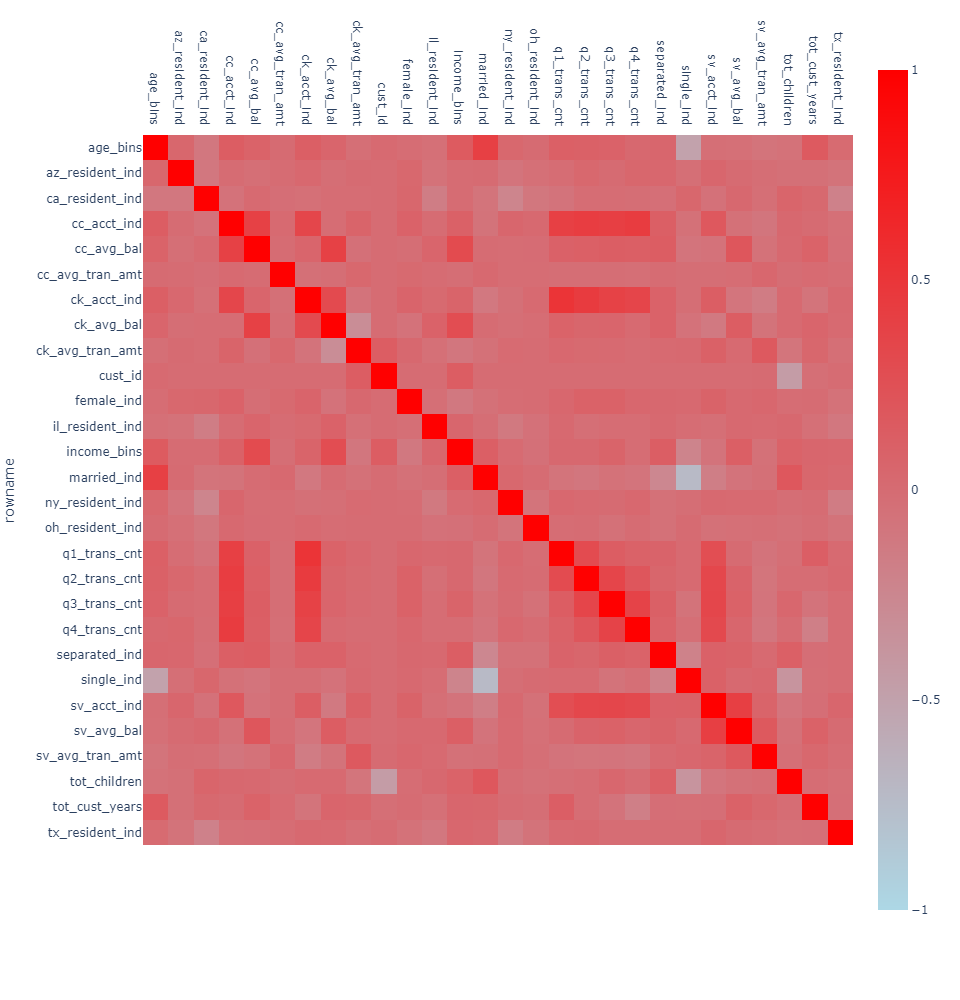

In [52]:
data = Cor_Mat.result.to_pandas().reset_index()
shaped_data = data.set_index("rowname").iloc[:,-len(data):].reindex(sorted(data.set_index("rowname").iloc[:,-len(data):]), axis=0).reindex(sorted(data.set_index("rowname").iloc[:,-len(data):]), axis=1)

fig = px.imshow(shaped_data, 
                x=shaped_data.index, 
                y=shaped_data.columns,
                color_continuous_scale=["lightblue","red"], 
                zmin=-1,
                zmax=1,
                height=1000,
               )

#z= [[np.round(float(i), 2) for i in nested] for nested in z]
fig.update_xaxes(side="top")          
fig.show()

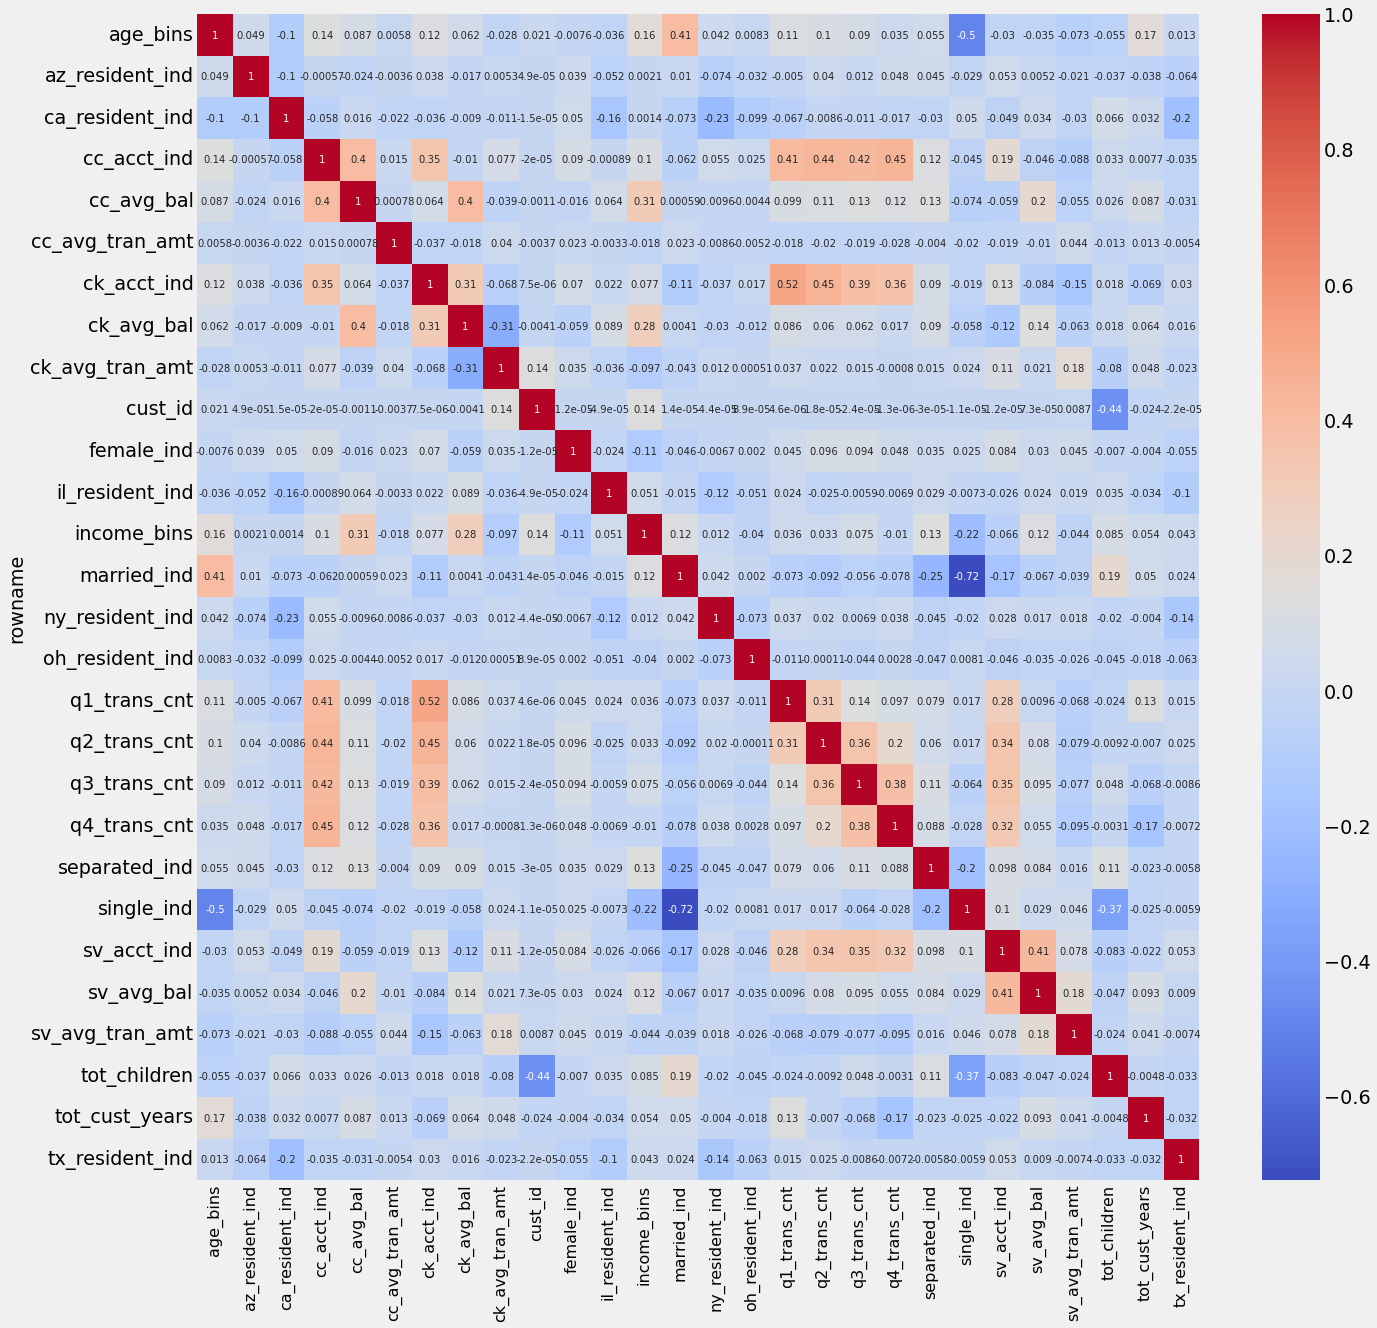

In [53]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
p = sns.heatmap(shaped_data, cmap='coolwarm', annot=True, annot_kws={'size':10})

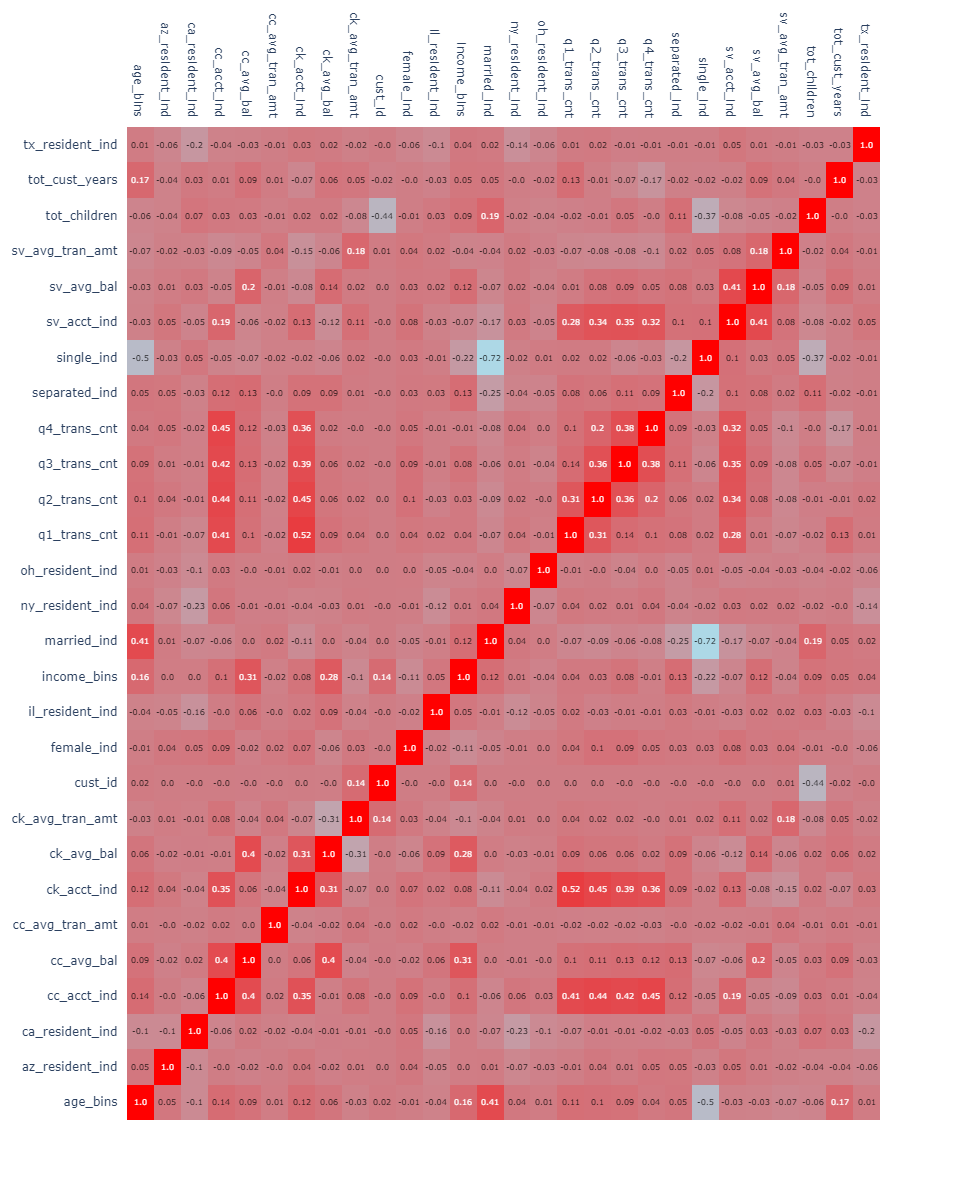

In [54]:
plt.rcParams['figure.figsize'] = (25, 10)

z = shaped_data.values
x=list(shaped_data.index)
y=list(shaped_data.columns)
z_text = [[np.round(float(i), 2) for i in nested] for nested in z]
colorscale = [[0,'lightblue'], [1, 'red']]
font_colors = ['black','white']


fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale=colorscale, font_colors=font_colors)

# Make text size smaller
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8

fig['layout'].update(
    width=1050,
    height=1200,
    autosize=False
)
fig.show()

In [55]:
Cor_Mat = valib.Matrix(data=ADS_Py, columns='all', exclude_columns="cust_id", group_columns = "state_code", type="COR")

# Print the results.
Cor_Mat.result.to_pandas().head(30)

income_bins  age_bins  \
state_code         rownum rowname                                  
OTHER              7      married_ind         0.116314  0.441962   
OH                 3      tot_cust_years     -0.053340  0.239160   
NY                 11     tx_resident_ind     1.000000  1.000000   
CA                 19     sv_avg_bal          0.008942 -0.054554   
TX                 7      married_ind        -0.036914  0.315418   
OH                 22     sv_avg_tran_amt    -0.171218 -0.179002   
IL                 13     az_resident_ind     1.000000  1.000000   
AZ                 3      tot_cust_years      0.109900  0.194760   
TX                 4      tot_children       -0.049941 -0.041965   
OH                 19     sv_avg_bal          0.072901  0.135435   
NY                 16     sv_acct_ind         0.033770 -0.026414   
AZ                 17     cc_acct_ind        -0.201855  0.304504   
IL                 11     tx_resident_ind     1.000000  1.000000   
CA                 17     cc_acct_ind         0.187521  0.232939   
                   9      ca_resident_ind     1.000000  1.000000   
OTHER              23     cc_avg_tran_amt    -0.024498  0.002905   
AZ                 9      ca_resident_ind     1.000000  1.000000   
CA                 11     tx_resident_ind     1.000000  1.000000   
NY                 15     ck_acct_ind         0.092499  0.104032   
IL                 12     il_resident_ind     1.000000  1.000000   
OH                 4      tot_children       -0.026521 -0.062469   
OTHER              6      single_ind         -0.190729 -0.486189   
NY                 22     sv_avg_tran_amt     0.022149 -0.105841   
AZ                 15     ck_acct_ind        -0.108314  0.079930   
TX                 17     cc_acct_ind         0.132600  0.108349   
OH                 23     cc_avg_tran_amt    -0.027560 -0.094310   
OTHER              2      age_bins            0.136156  1.000000   
NY                 1      income_bins         1.000000  0.033200   
TX                 20     cc_avg_bal          0.229288  0.065093   
OTHER              18     ck_avg_bal          0.304393  0.065984   

                                           tot_cust_years  tot_children  \
state_code         rownum rowname                                         
OTHER              7      married_ind            0.082395      0.169977   
OH                 3      tot_cust_years         1.000000     -0.139084   
NY                 11     tx_resident_ind        1.000000      1.000000   
CA                 19     sv_avg_bal             0.074492     -0.117994   
TX                 7      married_ind            0.088368      0.212137   
OH                 22     sv_avg_tran_amt        0.088986     -0.164688   
IL                 13     az_resident_ind        1.000000      1.000000   
AZ                 3      tot_cust_years         1.000000      0.115119   
TX                 4      tot_children           0.026504      1.000000   
OH                 19     sv_avg_bal             0.175966     -0.080357   
NY                 16     sv_acct_ind           -0.135618     -0.030805   
AZ                 17     cc_acct_ind            0.306578      0.052707   
IL                 11     tx_resident_ind        1.000000      1.000000   
CA                 17     cc_acct_ind           -0.141996      0.032335   
                   9      ca_resident_ind        1.000000      1.000000   
OTHER              23     cc_avg_tran_amt        0.003754     -0.014622   
AZ                 9      ca_resident_ind        1.000000      1.000000   
CA                 11     tx_resident_ind        1.000000      1.000000   
NY                 15     ck_acct_ind           -0.065634     -0.001960   
IL                 12     il_resident_ind        1.000000      1.000000   
OH                 4      tot_children          -0.139084      1.000000   
OTHER              6      single_ind             0.000071     -0.356165   
NY                 22     sv_avg_tran_amt       -0.051592      0.0

# Logistic Regression 

## LogReg() Function:

### SIGNATURE:
> valib.LogReg(data, matrix_data=None, columns=None, response_column=None, backward=None, backward_only=None, exclude_columns=None, cond_ind_threshold=30, constant=True, convergence=0.001, entrance_criterion=0.05, forward=None, forward_only=None, group_columns=None, lift_output=None, max_iter=100, mem_size=None, near_dep_report=None, remove_criterion=0.05, response_value=None, sample=None, stats_output=False, stepwise=False, success_output=False, start_threshold=None, end_threshold=None, increment_threshold=None, threshold_output=False, variance_prop_threshold=0.5)

### DESCRIPTION:
Logistic Regression is one of the most widely used types of statistical analysis. In Logistic Regression, a set of independent variables (in this case, columns) is processed to predict the value of a dependent variable (column) that assumes two values referred to as response (1) and non-response (0). The user can specify which value of the dependent variable to treat as the response, and all other values assumed by the dependent variable are treated as non-repsonse. The result is not, however, a continuous numeric variable as seen in Linear Regression, but rather a probability between 0 and 1 that the response value is assumed by the dependent variable.
There are many types of analysis that lend themselves to the use of Logistic Regression, and when scoring a model, benefit from the estimation of a probability rather than a fixed value. For example, when predicting who should be targeted for a marketing campaign, the scored customers can be ordered by the predicted probability from most to least likely, and the top n values taken from the customer list.
Some of the key features of Logistic Regression are outlined below.
- The Teradata table operator CALCMATRIX is used to build an ESSCP matrix for purposes of validating the input data, such as by checking for constant values. Also, to avoid rebuilding this matrix every time the algorithm is run, the user may run the Matrix Analysis separately, saving an ESSCP matrix in a teradataml DataFrame that can then be input to Logistic Regression. Refer "matrix_data" argument.
- One or more group by columns can optionally be specified so that an input matrix is built for each combination of group by column values, and subsequently a separate Logistic Regression model is built for each matrix. To achieve this, the names of the group by columns are passed to CALCMATRIX as parameters, so it includes them as columns in the matrix data it creates. Refer "group_columns" argument.
- The stepwise feature for Logistic Regression is a technique for selecting the independent variables in a logistic model. It consists of different methods of 'trying' variables and adding or removing them from a model through a series of forward and backward steps described in the parameter section. 
- A Statistics data is available, displaying the mean and standard deviation of each model variable. Refer to the "stats_output" argument.
- A Success data is available, displaying counts of predicted versus actual values of the dependent variable in the logistic model.
- A Multi-Threshold Success Table is available. Refer "threshold_output" argument.
- A Lift Table, such as would be used to build a Lift Chart, is available. Refer "lift_output" argument.
- A Near Dependency Report is available to identify two or more columns that may be collinear. 
- The algorithm is partially scalable because the size of each input matrix depends only on the number of independent variables (columns) and not on the size of the input data. The calculations performed on the client workstation however are not scalable when group by columns are used, because each model is built serially based on each matrix in the matrix data.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to build a logistic regression model from.

Types: teradataml DataFrame

#### columns:
Required Argument.
Specifies the name(s) of the column(s) representing the independent variables used in building a logistic regression model. Occasionally, it can also accept permitted strings to specify all columns, or all numeric columns.
Permitted Values: 
- Name(s) of the column(s) in "data".
- Pre-defined strings: 
    - 'all' – all columns
    - 'allnumeric' – all numeric columns

Types: str OR list of Strings (str)

#### response_column:
Required Argument.
Specifies the name of the column that represents the dependent variable being predicted.

Types: str

#### backward:
Optional Argument.
Specifies whether to take backward steps or not. Backward steps, i.e., removing variables from a model, use the P-value of the T-statistic, i.e., the ratio of a B-coefficient to its standard error. The variable (column) with the largest P-value is removed if the P-value exceeds the criterion to remove.

Types: bool

#### backward_only:
Optional Argument.
Specifies whether to use only backward technique or not. This technique is similar to the backward technique, except that a forward step is not performed. It starts with all independent variables in the model. Backward steps are executed until no more are possible.

Types: bool

#### exclude_columns:
Optional Argument.
Specifies the name(s) of the column(s) to exclude from the analysis, if a column specifier such as 'all', 'allnumeric' is used in the "columns" argument. By default, when the "exclude_columns" argument is used, dependent variable and group by columns, if any, are automatically excluded as input columns and do not need to be included as "exclude_columns".

Types: str OR list of Strings (str)

#### cond_ind_threshold:
Optional Argument.
Specifies the condition index threshold value to use while generating near dependency report. This is used when "near_dep_report" is set to True.
Default Value: 30

Types: int

#### constant:
Optional Argument.
Specifies whether the logistic model includes a constant term or not. When set to True, model includes a constant term.
Default Value: True

Types: bool

#### convergence:
Optional Argument.
Specifies the convergence criterion such that the algorithm stops iterating when the change in log likelihood function falls below this value.
Default Value: 0.001

Types: float

#### entrance_criterion:
Optional Argument.
Specifies the criterion to enter a variable into the model. The W-statistic chi-square P-value must be less than this value for a variable to be added.
Default Value: 0.05

Types: float

#### forward:
Optional Argument.
Specifies whether to use forward technique or not. When set to True, in this technique, starting with no independent variables in the model, a forward step is performed, adding the "best" choice, followed by a backward step, removing the "worst" choice. Refer to the "stepwise" argument for a description of the steps in this technique.

Types: bool

#### forward_only:
Optional Argument.
Specifies whether to use only forward technique or not. This technique is similar to the forward technique, except that a backward step is not performed. 

Types: bool

#### group_columns:
Optional Argument.
Specifies the name(s) of the column(s) dividing the input into partitions, one for each combination of values in the group by columns. For each partition or combination of values a separate logistic model and XML report is built.

Types: str OR list of Strings (str)

#### lift_output:
Optional Argument.
Specifies whether to build a lift chart or not and add it in the functions output string. It splits up the computed probability values into deciles with the usual counts and percentages to demonstrate what happens when more and more rows of ordered probabilities are accumulated.

Types: bool

#### matrix_data:
Optional Argument.
Specifies the input matrix data to use for the analysis. Instead of internally building a matrix with the Matrix function each time this analysis is performed, the user may build an ESSCP Matrix once with the Matrix Analysis using Matrix() function. The matrix can subsequently be read from this data instead of re-building it each time. If this is specified, the columns specified with the "columns" argument should be a subset of the columns in this matrix and can be specified in any order. The columns must however all be present in the matrix. Further, if group by columns are specified in the matrix, these same group by columns must be specified in this analysis.

Types: teradataml DataFrame

#### max_iter:
Optional Argument.
Specifies The maximum number of attempts to converge on a solution.
Default Value: 100

Types: int

#### mem_size:
Optional Argument.
Specifies the memory size in megabytes to allocate for in-memory Logistic Regression. If there is too much data to fit in this amount of memory or is set to 0 or argument is not specified, normal SQL processing is performed. 

Types: int

#### near_dep_report:
Optional Argument.
Specifies whether to produce an XML report showing columns that may be collinear as part of the output or not. The report is included in the XML output only if collinearity is detected.
Two threshold arguments are available for this report, "cond_ind_threshold" and "variance_prop_threshold". 

Types: bool

#### remove_criterion:
Optional Argument.
Specifies the criterion to remove a variable from the model. The T-Statistic P-value must be greater than this value for a variable to be removed.
Default Value: 0.05

Types: float

#### response_value:
Optional Argument.
Specifies the value assumed by the dependent column that is to be treated as the response value.

Types: str

#### sample:
Optional Argument.
Specifies whether to use sample of the data to be read into memory for processing, if the memory size available is less than the amount of data to process. When set to True, a sample of data is read.

Types: bool

#### stats_output:
Optional Argument.
Specifies whether an optional data quality report should be delivered in the function's XML output string or not, which includes the mean and standard deviation of each model variable, derived from an ESSCP matrix.
Default Value: False

Types: bool

#### stepwise:
Optional Argument.
Specifies whether to perform a stepwise procedure or not. 
Forward steps, i.e., adding variables to a model, add the variable with the smallest chi-square P-value connected to its special W-statistic, provided the P-value is less than the criterion to enter. 
Backward steps, i.e., removing variables from a model, use the P-value of the T-statistic, i.e., the ratio of a B-coefficient to its standard error. The variable (column) with the largest P-value is removed if the P-value exceeds the criterion to remove.
Default Value: False

Types: bool

#### success_output:
Optional Argument.
Specifies whether an optional success report should be delivered in the function's XML output string or not, which includes the displaying counts of predicted versus actual values of the dependent variable of the logistic regression model. This report is similar to the Decision Tree Confusion Matrix, but the success report only includes two values of the dependent variable, namely response versus non-response.
Default Value: False

Types: bool

#### start_threshold:
Optional Argument.
Specifies the beginning threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### end_threshold:
Optional Argument.
Specifies the ending threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### increment_threshold:
Optional Argument.
Specifies the difference in threshold values between adjacent rows in the Multi-Threshold Success output.

Types: float, int

#### threshold_output:
Optional Argument.
Specifies whether the Multi-Threshold Success output should be produced or not and included in the XML output string in the result. This report can be thought of as a table where each row is a Prediction Success Table, and each row has a different threshold value as generated by the "start_threshold", "end_threshold", and "increment_threshold" arguments. What is meant by a threshold here is the value above which the predicted probability indicates a response.
Default Value: False

Types: bool

#### variance_prop_threshold:
Optional Argument.
Specifies the variance proportion threshold value to use while generating near dependency report. This is used when "near_dep_report" is set to True.
Default Value: 0.5

Types: float

### RETURNS:
An instance of LogReg.
Output teradataml DataFrames can be accessed using attribute references, such as LogRegObj.<attribute_name>.
Output teradataml DataFrame attribute names are:
1. model
2. statistical_measures
3. xml_reports

### RAISES:
TeradataMlException, TypeError, ValueError

1.  Using the ADS_Py table, lets build a logistic regression model to predict the customer bases propensity to open a credit card account (cc_acct_ind) based upon all non-credit card variables in the analytic data set.  The model coefficients and variable statistics are created within the model and statistical_measure objects.  The reports for the success table, threshold table and lift table are returned in an XML string within the xml_reports object.

In [56]:
Logit_Model = valib.LogReg(data=ADS_Py, 
                           columns='all', 
                           exclude_columns="cust_id, state_code, cc_avg_tran_amt, cc_avg_bal",
                           response_column="cc_acct_ind", 
                           response_value=1,
                           threshold_output='true',
                           near_dep_report='true', 
                           cond_ind_threshold=25,
                           variance_prop_threshold=0.5)

# Print the results using pandas for readability

In [57]:
Logit_Model.model.to_pandas().head(30)

B Coefficient  Standard Error  Wald Statistic  T Statistic  \
Column Name                                                                   
ck_avg_tran_amt       0.006676        0.000926       51.939900     7.206934   
tx_resident_ind      -0.307696        0.151208        4.140891    -2.034918   
oh_resident_ind       0.790995        0.281002        7.923734     2.814913   
married_ind           0.355546        0.157996        5.064086     2.250352   
(Constant)           -0.010206        0.274499        0.001382    -0.037182   
single_ind            0.802222        0.179436       19.987996     4.470794   
sv_avg_tran_amt       0.000208        0.000631        0.108643     0.329610   
q2_trans_cnt          0.036306        0.001537      558.004948    23.622128   
separated_ind         1.704625        0.251997       45.757944     6.764462   
sv_avg_bal           -0.000124        0.000016       64.109310    -8.006829   
tot_cust_years        0.055857        0.015846       12.426011     3.525055   
q4_trans_cnt          0.052511        0.001660     1000.402228    31.629136   
income_bins           0.035043        0.004612       57.738020     7.598554   
ca_resident_ind      -0.616516        0.114997       28.742066    -5.361163   
q3_trans_cnt          0.037182        0.001574      558.039657    23.622863   
az_resident_ind      -1.099712        0.252951       18.901075    -4.347537   
age_bins              0.106736        0.024454       19.050982     4.364743   
ck_avg_bal           -0.000043        0.000012       13.390572    -3.659313   
sv_acct_ind          -3.725782        0.140628      701.927965   -26.493923   
female_ind            0.031585        0.089059        0.125779     0.354653   
tot_children          0.091757        0.034352        7.134816     2.671108   
ck_acct_ind          -6.186405        0.189094     1070.332954   -32.715943   
il_resident_ind       0.312812        0.165530        3.571216     1.889766   
q1_trans_cnt          0.023858        0.000835      816.280374    28.570621   
ny_resident_ind      -0.285206        0.143916        3.927326    -1.981748   

                       P-Value  Odds Ratio     Lower     Upper  Partial R  \
Column Name                                                                 
ck_avg_tran_amt   6.170620e-13    1.006698  1.004872  1.008527   0.066437   
tx_resident_ind   4.188753e-02    0.735138  0.546588  0.988730  -0.013756   
oh_resident_ind   4.889336e-03    2.205590  1.271557  3.825724   0.022881   
married_ind       2.444992e-02    1.426959  1.046949  1.944902   0.016456   
(Constant)        9.703409e-01         NaN       NaN       NaN        NaN   
single_ind        7.885610e-06    2.230491  1.569149  3.170566   0.039873   
sv_avg_tran_amt   7.417021e-01    1.000208  0.998972  1.001446   0.000000   
q2_trans_cnt      0.000000e+00    1.036973  1.033854  1.040101   0.221679   
separated_ind     1.418976e-11    5.499325  3.355900  9.011764   0.062189   
sv_avg_bal        1.318831e-15    0.999876  0.999845  0.999906  -0.074091   
tot_cust_years    4.254382e-04    1.057447  1.025110  1.090803   0.030356   
q4_trans_cnt      0.000000e+00    1.053914  1.050490  1.057349   0.297056   
income_bins       3.286260e-14    1.035664  1.026345  1.045068   0.070188   
ca_resident_ind   8.467593e-08    0.539822  0.430888  0.676294  -0.048616   
q3_trans_cnt      0.000000e+00    1.037882  1.034685  1.041089   0.221686   
az_resident_ind   1.391450e-05    0.332967  0.202810  0.546655  -0.038649   
age_bins          1.286519e-05    1.112640  1.060570  1.167267   0.038820   
ck_avg_bal        2.542960e-04    0.999957  0.999934  0.999980  -0.031729   
sv_acct_ind      3.687545e-149    0.024094  0.018290  0.031741  -0.248721   
female_ind        7.228579e-01    1.032089  0.866782  1.228922   0.000000   
tot_children      7.573342e-03    1.096098  1.024730  1.172437   0.021303   
ck_acct_ind      2.859515e-222    0.002057  0.001420  0.002980  -0.307283   
il_resident_ind   5.882040e-02    1

In [58]:
Logit_Model.statistical_measures.to_pandas().head(30)

Total Observations  Total Iterations  Initial Log Likelihood  \
rid                                                                 
1                9296.0               8.0             -5657.17719   

     Final Log Likelihood  Likelihood Ratio Test G Statistic  \
rid                                                            
1            -1810.653056                        7693.048268   

     Chi-Square Degrees of Freedom  Chi-Square Value  Chi-Square Probability  \
rid                                                                            
1                             24.0         36.415029                     0.0   

     McFaddens Pseudo R-Squared Dependent Variable  Dependent Response Value  \
rid                                                                            
1                      0.679937        cc_acct_ind                       1.0   

     Total Distinct Values  
rid                         
1                      2.0

In [59]:
#obj = valib.XmlToHtmlReport(data=Logit_Model.model, analysis_type="logistic")
#print(obj.result)

Currently, teradataml 17.0.0.3 does not support the VAL 2.0.0.3 'report' function in td_analyze.  Until that time, we need to reach out and execute a SQL statement to convert the XML reports to HTML for display purposes.  The following block of code does just that:

In [60]:
from IPython.core.display import display, HTML

cursor=td_context.raw_connection().cursor()
parms = 'database=' + Logit_Model.xml_reports._table_name.split('.')[0] + ';tablename=' + Logit_Model.xml_reports._table_name.split('.')[1] + ';analysistype=logistic'
cursor.callproc("val.td_analyze", ['report',parms])
cursor.nextset()
z=cursor.fetchall()
# Loop in case of group by generating multiple reports
for i in range(len(z)):
    display(HTML(z[i][1]))

2.  Using the same table, lets build a logistic regression model to predict the customer bases propensity to open a credit card account (cc_acct_ind), by state,  based upon all non-credit card variables in the analytic data set.  This type of micro-modelling is done using the groupby option.  The model coefficients and variable statistics are created within the model and statistical_measure objects.  The reports for the success table, threshold table and lift table are returned in an XML string within the xml_reports object.

In [61]:
Logit_Model2 = valib.LogReg(data=ADS_Py, 
                            columns='all', 
                            exclude_columns="cust_id, az_resident_ind, il_resident_ind, oh_resident_ind, tx_resident_ind, ny_resident_ind, ca_resident_ind, cc_avg_tran_amt, cc_avg_bal",
                            response_column="cc_acct_ind", 
                            response_value=1,
                            threshold_output='true',
                            near_dep_report='true', 
                            cond_ind_threshold=25,
                            variance_prop_threshold=0.5,
                            group_columns="state_code")

# Print the results using pandas for readability

In [62]:
Logit_Model2.model.to_pandas().head(30)

Column Name  \
state_code                                                              
OTHER                                                      (Constant)   
NY                                                         (Constant)   
TX                                                         (Constant)   
OH                  ***Constant columns detected...run terminated.***   
OTHER                                                     income_bins   
NY                                                        income_bins   
TX                                                        income_bins   
AZ                                                         (Constant)   
OTHER                                                        age_bins   
NY                                                           age_bins   
TX                                                           age_bins   
AZ                                                        income_bins   
OTHER                                                  tot_cust_years   
NY                                                     tot_cust_years   
TX                                                     tot_cust_years   
AZ                                                           age_bins   
OTHER                                                    tot_children   
NY                                                       tot_children   
TX                                                       tot_children   
AZ                                                     tot_cust_years   
OTHER                                                      female_ind   
NY                                                         female_ind   
TX                                                         female_ind   
AZ                                                       tot_children   
OTHER                                                      single_ind   
NY                                                         single_ind   
TX                                                         single_ind   
AZ                                                         female_ind   
OTHER                                                     married_ind   
NY                                                        married_ind   

                    B Coefficient  Standard Error  Wald Statistic  \
state_code                                                          
OTHER                   -1.045952        0.434314        5.799825   
NY                      16.854321        3.578191       22.186844   
TX                      -1.636467        1.237917        1.747557   
OH                            NaN             NaN             NaN   
OTHER                    0.044420        0.008792       25.527609   
NY                       0.052368        0.047233        1.229229   
TX                       0.035747        0.013920        6.594530   
AZ                       5.315593     1335.717371        0.000016   
OTHER                    0.194932        0.038173       26.076660   
NY                      -3.883268        0.702623       30.545716   
TX                      -0.144151        0.106349        1.837261   
AZ                      -0.048339       16.391501        0.000009   
OTHER                    0.113180        0.026146       18.738881   
NY                       0.505713        0.191880        6.946261   
TX                       0.362234        0.081484       19.762073   
AZ                       0.879683       94.187256        0.000087   
OTHER                    0.155857        0.054957        8.042646   
NY                      -0.061308        0.296056        0.042883   
TX                       0.396439        0.154827        6.556280   
AZ                      -0.082114       53.647230        0.000002   
OTHER                    0.196259        0.149945        1.713141   
NY                      -6.165465        1.986235        9.635416   
TX                       0.556647        0.416337        1.787595

In [63]:
Logit_Model2.statistical_measures.to_pandas().head(30)

state_code  Total Observations  Total Iterations  \
rid                                                             
5    OH                               322.0               NaN   
7    TX                              1050.0               9.0   
6    OTHER                           3388.0               9.0   
3    IL                               714.0              13.0   
4    NY                              1344.0              14.0   
1    AZ                               308.0              14.0   
2    CA                              2226.0              11.0   

     Initial Log Likelihood  Final Log Likelihood  \
rid                                                 
5                       NaN                   NaN   
7               -686.089105           -137.647994   
6              -1975.698007           -655.836860   
3               -444.143078           -126.952690   
4               -723.431457            -50.454913   
1               -192.651339             -0.000559   
2              -1452.564665           -180.140678   

     Likelihood Ratio Test G Statistic  Chi-Square Degrees of Freedom  \
rid                                                                     
5                                  NaN                            NaN   
7                          1096.882220                           18.0   
6                          2639.722294                           18.0   
3                           634.380777                           18.0   
4                          1345.953087                           18.0   
1                           385.301559                           18.0   
2                          2544.847973                           18.0   

     Chi-Square Value  Chi-Square Probability  McFaddens Pseudo R-Squared  \
rid                                                                         
5                 NaN                     NaN                         NaN   
7           28.869299                     0.0                    0.799373   
6           28.869299                     0.0                    0.668048   
3           28.869299                     0.0                    0.714163   
4           28.869299                     0.0                    0.930256   
1           28.869299                     0.0                    0.999997   
2           28.869299                     0.0                    0.875984   

    Dependent Variable  Dependent Response Value  Total Distinct Values  
rid                                                                      
5                 None                       NaN                    NaN  
7          cc_acct_ind                       1.0                    2.0  
6          cc_acct_ind                       1.0                    2.0  
3          cc_acct_ind                       1.0                    2.0  
4          cc_acct_ind                       1.0                    2.0  
1          cc_acct_ind                       1.0                    2.0  
2          cc_acct_ind                       1.0                    2.0

Currently, teradataml 17.0.0.3 does not support the VAL 2.0.0.3 'report' function in td_analyze.  Until that time, we need to reach out and execute a SQL statement to convert the XML reports to HTML for display purposes.  The following block of code does just that:

In [64]:
from IPython.core.display import display, HTML

cursor=td_context.raw_connection().cursor()
parms = 'database=' + Logit_Model2.xml_reports._table_name.split('.')[0] + ';tablename=' + Logit_Model2.xml_reports._table_name.split('.')[1] + ';analysistype=logistic'
cursor.callproc("val.td_analyze", ['report',parms])
cursor.nextset()
z=cursor.fetchall()
# Loop in case of group by generating multiple reports
for i in range(len(z)):
    display(HTML(z[i][1]))

# Logistic Regression Evaluation

## LogRegEvaluator() Function:

### SIGNATURE:
>valib.LogRegEvaluator(data, model, estimate_column=None, index_columns=None, prob_column=None, accumulate=None, prob_threshold=0.5, start_threshold=None, end_threshold=None, increment_threshold=None)

### DESCRIPTION:
Logistic Regression function model can be passed to this function to generate evaluation reports. Function produces the result containing the following reports in XML format:
- Success result – This output is delivered in the function's XML output string, displaying counts of predicted versus actual values of the dependent variable of the logistic regression model. This report is similar to the Decision Tree Confusion Matrix, but the Success output only includes two values of the dependent variable, namely response versus non-response.
- Multi-Threshold Success result - This output is delivered in the function's XML output string. Report can be thought of as a table where each row is a Prediction Success Output, and each row has a different threshold value as generated by the "start_threshold", "end_threshold", and "increment_threshold" arguments. What is meant by a threshold here is the value above which the predicted probability indicates a response.
- Lift result – Result containing information, such as would be required to build a lift chart is available. It splits up the computed probability values into deciles with the usual counts and percentages to demonstrate what happens when more and more rows of ordered probabilities are accumulated. It is delivered in the function's XML output string.

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to evaluate.

Types: teradataml DataFrame

#### model:
Required Argument.
Specifies the input containing the logistic model to use in scoring. This must be the "model" teradataml DataFrame generated by LogReg() function from VALIB or a teradataml DataFrame created on a table generated by 'logistic' function from Vantage Analytic Library.

Types: teradataml DataFrame

#### estimate_column:
Required Argument.
Specifies the name of a column in the score output containing the estimated value of the dependent variable (column).
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the estimate column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### index_columns:
Optional Argument.
Specifies the name(s) of the column(s) representing the primary index of the score output. By default, the primary index columns of the score output are the primary index columns of the input. In addition, the index columns need to form a unique key for the score output. Otherwise, there are more than one score for a given observation.

Types: str OR list of Strings (str)

#### prob_column:
Optional Argument.
Specifies the name of a column in the score output containing the probability that the dependent value is equal to the response value.
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the probability column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### accumulate:
Optional Argument.
Specifies the name(s) of the column(s) from the input to retain in the output. 

Types: str OR list of Strings (str)

#### prob_threshold:
Optional Argument.
Specifies the probability threshold value. When the probability of the dependent variable being 1 is greater than or equal to this value, the estimated value of the dependent variable is 1. If less than this value, the estimated value is 0.
Default Value: 0.5

Types: float, int

#### start_threshold:
Optional Argument.
Specifies the beginning threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### end_threshold:
Optional Argument.
Specifies the ending threshold value utilized in the Multi-Threshold Success output.

Types: float, int

#### increment_threshold:
Optional Argument.
Specifies the difference in threshold values between adjacent rows in the Multi-Threshold Success output.

Types: float, int

### RETURNS:
An instance of LogRegEvaluator.
Output teradataml DataFrames can be accessed using attribute references, such as LogRegEvaluatorObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result

### RAISES:
TeradataMlException, TypeError, ValueError

3. Evaluate the logistic regression model - note that this option is not available when the group by option is used.

In [65]:
Logit_Model_Eval = valib.LogRegEvaluator(data=ADS_Py, 
                                         model=Logit_Model.model, 
                                         index_columns="cust_id",
                                         prob_column="Probability")

In [66]:
from IPython.core.display import display, HTML

cursor=td_context.raw_connection().cursor()
parms = 'database=' + Logit_Model_Eval.result._table_name.split('.')[0] + ';tablename=' + Logit_Model_Eval.result._table_name.split('.')[1] + ';analysistype=logisticscore'
cursor.callproc("val.td_analyze", ['report',parms])
cursor.nextset()
z=cursor.fetchall()
# Loop in case of group by generating multiple reports
for i in range(len(z)):
    display(HTML(z[i][1]))

# Logistic Regression Scoring

## LogRegPredict() Function:

### SIGNATURE:
> valib.LogRegPredict(data, model, estimate_column=None, index_columns=None, prob_column=None, accumulate=None, prob_threshold=0.5)

### DESCRIPTION:
Logistic Regression function model can be passed to a Logistic Regression Scoring function to create a score output containing predicted values of the dependent variable. 

### PARAMETERS:

#### data:
Required Argument.
Specifies the input data to score.

Types: teradataml DataFrame

#### model:
Required Argument.
Specifies the input containing the logistic model to use in scoring. This must be the "model" teradataml DataFrame generated by LogReg() function from VALIB or a teradataml DataFrame created on a table generated by 'logistic' function from Vantage Analytic Library.

Types: teradataml DataFrame

#### estimate_column:
Required Argument.
Specifies the name of a column in the score output containing the estimated value of the dependent variable (column).
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the estimate column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### index_columns:
Optional Argument.
Specifies the name(s) of the column(s) representing the primary index of the score output. By default, the primary index columns of the score output are the primary index columns of the input. In addition, the index columns need to form a unique key for the score output. Otherwise, there are more than one score for a given observation.

Types: str OR list of Strings (str)

#### prob_column:
Optional Argument.
Specifies the name of a column in the score output containing the probability that the dependent value is equal to the response value.
Notes:
    1. Either "estimate_column" or "prob_column" must be requested.
    2. If the probability column is not unique in the score output, '_tm_' is automatically placed in front of the name.

Types: str

#### accumulate:
Optional Argument.
Specifies the name(s) of the column(s) from the input to retain in the output. 

Types: str OR list of Strings (str)

#### prob_threshold:
Optional Argument.
Specifies the probability threshold value. When the probability of the dependent variable being 1 is greater than or equal to this value, the estimated value of the dependent variable is 1. If less than this value, the estimated value is 0.
Default Value: 0.5
Types: float, int

### RETURNS:
An instance of LogRegPredict.
Output teradataml DataFrames can be accessed using attribute references, such as LogRegPredictObj.<attribute_name>.
Output teradataml DataFrame attribute name is: result

### RAISES:
TeradataMlException, TypeError, ValueError

4. Score the Logistic Regression Models

In [67]:
Logit_Model_Score = valib.LogRegPredict(data=ADS_Py, 
                                        model=Logit_Model.model, 
                                        index_columns="cust_id",
                                        estimate_column="cc_acct_ind",
                                        prob_column="Probability")
 
# Print the results using pandas for readability

Logit_Model_Score.result.to_pandas().head(20)

Probability  cc_acct_ind
cust_id                           
25902814     0.998941          1.0
24532272     0.999991          1.0
28620753     0.186719          0.0
24526440     0.994567          1.0
25897247     0.999894          1.0
20443995     0.999602          1.0
27259000     0.019952          0.0
25891680     1.000000          1.0
21805952     0.995510          1.0
23166359     0.980383          1.0
14996718     0.092019          0.0
24535494     0.999938          1.0
21803872     0.502270          1.0
14998390     0.027572          0.0
17715126     0.299331          0.0
16352904     0.498843          0.0
27254840     0.316201          0.0
31355923     0.629274          1.0
28622160     0.943616          1.0
31340099     0.985658          1.0

In [68]:
Logit_Model_Score2 = valib.LogRegPredict(data=ADS_Py, 
                                         model=Logit_Model2.model, 
                                         index_columns="cust_id",
                                         estimate_column="cc_acct_ind",
                                         prob_column="Probability")
 
# Print the results using pandas for readability

Logit_Model_Score2.result.to_pandas().head(20)

state_code   Probability  cc_acct_ind
cust_id                                                
25902814  CA                  1.000000e+00          1.0
24532272  OTHER               9.999957e-01          1.0
28620753  OTHER               1.259629e-01          0.0
24526440  CA                  9.999924e-01          1.0
25897247  NY                  1.000000e+00          1.0
20443995  OTHER               9.994529e-01          1.0
27259000  OTHER               1.791351e-02          0.0
25891680  IL                  1.000000e+00          1.0
21805952  CA                  9.998664e-01          1.0
23166359  NY                  1.000000e+00          1.0
14996718  CA                  7.810375e-04          0.0
24535494  OTHER               9.999190e-01          1.0
21803872  OTHER               6.478030e-01          1.0
14998390  OTHER               4.120298e-02          0.0
17715126  OTHER               2.889838e-01          0.0
16352904  OTHER               6.276300e-01          1.0
27254840  OTHER               3.874509e-01          0.0
31355923  AZ                  3.554671e-07          0.0
28622160  OTHER               9.527251e-01          1.0
31340099  TX                  9.848640e-01          1.0

## Cleanup

In [69]:
td_context.execute('DROP TABLE Demo_user.Accounts;')

In [70]:
td_context.execute('DROP TABLE Demo_user.Customer;')

In [71]:
td_context.execute('DROP TABLE Demo_user.Transactions;')

## End of session

In [72]:
# Remove the context of present teradataml session and terminate the Python session.
# It is recommended to call the remove_context() function for session cleanup.
# Temporary objects are removed at the end of the session.

from teradataml import remove_context
remove_context()

True

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2021 Teradata. All Rights Reserved</footer>